## CGLMP Cuts Analysis

This is the truth-level analysis of Bell Study. It includes two parts 'kinematics' and 'CGLMP' analysis.

> Author : Y.Y. Gary Peng  
> Istitute: National Tsing Hua University, Taiwan and ATLAS experiment, CERN  
> License : MIT  
> Data : June 17, 2023  
> Email : yuan-yen.peng@cern.ch

Version : 1.0


In [1]:
%reset -f

In [50]:
import os
import gc
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from numba import jit
import matplotlib.pyplot as plt
import plot.AtlasPlot as atlas
# import uproot
# import ROOT

In [3]:

def get_files_names(path):
    files_name = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            files_name.append(os.path.join(dirname, filename))
    return files_name

path = "./truth/"
files_name = get_files_names(path)
print(files_name)

['./truth/CGLMP.npz', './truth/WpBoson.npz', './truth/subLeadLepton.npz', './truth/LeptonP.npz', './truth/Higgs.npz', './truth/LeadLepton.npz', './truth/LeptonM.npz', './truth/xi_xyz.npz', './truth/WmBoson.npz', './truth/LmNu.npz', './truth/LpNu.npz', './truth/MET.npz', './truth/diLepton.npz']


In [4]:
def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()

In [5]:
files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))

In [6]:
# need to check the order of data name.
files_name

['./truth/CGLMP.npz',
 './truth/Higgs.npz',
 './truth/LeadLepton.npz',
 './truth/LeptonM.npz',
 './truth/LeptonP.npz',
 './truth/LmNu.npz',
 './truth/LpNu.npz',
 './truth/MET.npz',
 './truth/WmBoson.npz',
 './truth/WpBoson.npz',
 './truth/diLepton.npz',
 './truth/subLeadLepton.npz',
 './truth/xi_xyz.npz']

In [7]:
# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    LmNu,
    LpNu,
    MET,
    WmBoson,
    WpBoson,
    diLep,
    SubLep,
    Xi,
) = files
GeV=1e3

del files_name, files
gc.collect()

22

In [53]:
def CGLMP_analysis(CutName: str, Cuts: list=[]) -> list:
      if len(Cuts) == 0:
            data = CGLMP
            warnings.warn("No cut applied...")
            cri = np.ones(len(CGLMP), dtype=bool)
      else:
            cri = np.prod(Cuts, axis=0).astype(bool)
            data = CGLMP[cri]
      Bxy = np.average(data['Bxy'])
      Bxz = np.average(data['Bzx'])
      Byz = np.average(data['Byz'])
      I3 = np.max([Bxy, Bxz, Byz])

      print(f'''# {CutName}
Bxy = {Bxy:1.3f}
Bxz = {Bxz:1.3f}
Byz = {Byz:1.3f}
-> I3 = {I3 :1.3f}\n''')
      
      return cri

In [61]:
def plot(
    data: np.ndarray,
    label: list,
    name: str,
    binNum: int = 70,
    loc: int = 4,
    save=False,
) -> None:
    
    mini = np.min(data)
    maxi = np.max(data)

    hp = atlas.ATLAShist(mini, maxi, binNum, "Bell", "HWW", "CutAnalysis")
    hp.set_data([data])
    hp.set_graph(
        color=["blue"],
        xlabel=label,
        ylabel="Events",
        lib_name="Simulation",
    )
    hp.histfill_1d(
        plottype="step",
        filename=name,
        legend_name=label,
        show=True,
        dump=save,
        loc=loc,
    )
    
    plt.close()

    return


In [14]:
# Cut_LeadLep > 22
# Cut_SubLeadLep > 15
# Cut_mll_1 > 10
# Cut_MET > 20

# Cut_mll_2 < 55
# DPhill < 1.8

/var/folders/6m/8m1_nvcx5dj45blhn0kz5x400000gn/T/ipykernel_23633/3612291869.py:4: UserWarning: No cut applied...
  warnings.warn("No cut applied...")


# None
Bxy = 2.210
Bxz = 2.735
Byz = 2.491
-> I3 = 2.735

Use same units...

Data 0:
    The average of CutAnalysis is 39.78;
    The STD     of CutAnalysis is 19.734;
    The SEM     of CutAnalysis is 0.012613.



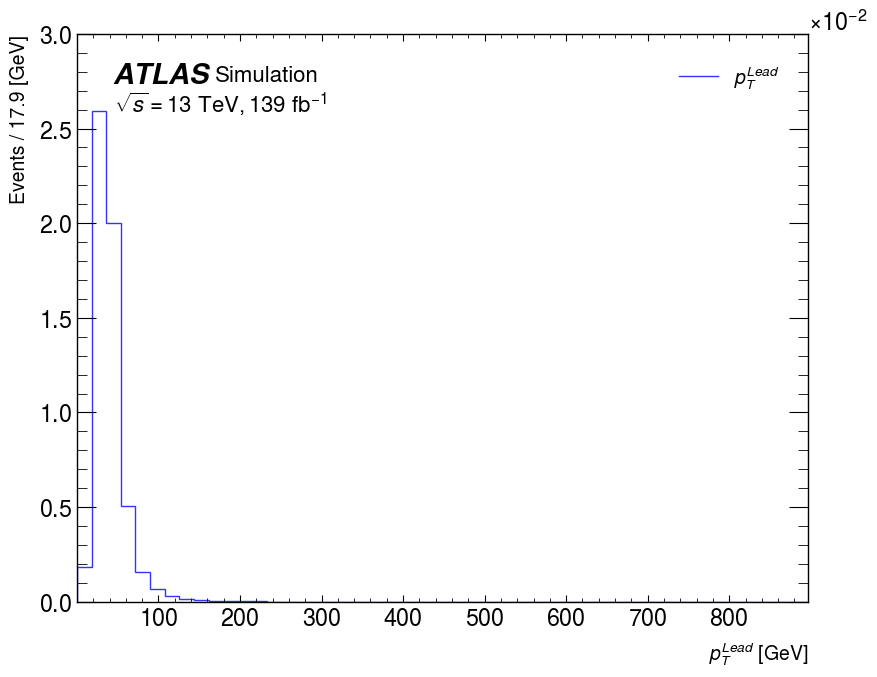

1D, Finish!


In [62]:
Cut_None = CGLMP_analysis("None")
# plot(LeadLep[Cut_None]["pt"]/GeV, label=r"$p^{Lead}_T$", name="None")

In [43]:
Cut_pT_LeadLep = CGLMP_analysis("pT_LeadLep", Cuts=[LeadLep["pt"]/GeV>22])

# pT_LeadLep
Bxy = 2.193
Bxz = 2.877
Byz = 2.300
-> I3 = 2.877



In [44]:
Cut_pT_SubLeadLep = CGLMP_analysis("pT_SubLeadLep", Cuts=[LeadLep["pt"]/GeV>22, SubLep["pt"]/GeV>15])

# pT_SubLeadLep
Bxy = 2.542
Bxz = 3.094
Byz = 2.117
-> I3 = 3.094



In [47]:
Cut_pT_Mll = CGLMP_analysis("mll", Cuts=[LeadLep["pt"]/GeV>22, SubLep["pt"]/GeV>15, diLep["m"]>10])

# mll
Bxy = 2.542
Bxz = 3.094
Byz = 2.117
-> I3 = 3.094



In [46]:
# Cut_pT_MET = CGLMP_analysis("MET", Cuts=[LeadLep["pt"]/GeV>22, SubLep["pt"]/GeV>15, diLep["m"]>10, MET["pt"]>20])

In [ ]:
def corr_matrix(df: pd.DataFrame, title: str, barrange=[-0.1, 1]) -> None:
    corr_matrix = df.corr()
    plt.style.use("default")
    _, ax = plt.subplots(figsize=(10, 10), dpi=100)
    im = ax.imshow(corr_matrix.values, cmap="Blues", vmin=barrange[0], vmax=barrange[1])
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_yticklabels(corr_matrix.columns)
    # rotate tick labels
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        rotation_mode="anchor",
        fontsize=10,
    )
    plt.setp(ax.get_yticklabels(), fontsize=10)
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.85)
    cbar.ax.tick_params(labelsize=10)
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            ax.text(
                j,
                i,
                round(corr_matrix.values[i, j], 2),
                ha="center",
                va="center",
                color="w",
            )
    ax.set_title(f"Correlation Matrix ({title})", fontsize=14)
    # add black lines to separate blocks
    for n in range(3):
        ax.axvline(x=3.5 + 4 * n, color="grey", linewidth=1)
        ax.axhline(y=3.5 + 4 * n, color="grey", linewidth=1)

    plt.show()

    return


In [11]:
# CGLMP analysis

base_sig_Bxy_avg = np.average(base_sig_Bxy)
preselect_sig_Bxy_avg = np.average(preselect_sig_Bxy)
topology_sig_Bxy_avg = np.average(topology_sig_Bxy)
base_uncert_sig_Bxy = stats.sem(base_sig_Bxy)
preselect_uncert_sig_Bxy = stats.sem(preselect_sig_Bxy)
topology_uncert_sig_Bxy = stats.sem(topology_sig_Bxy)
print(
    f"""##########################################
1. with size of base cut\t: {len(base_sig_Bxy)};
2. with size of preselection cut: {len(preselect_sig_Bxy)};
3. with size of topology cut\t: {len(topology_sig_Bxy)}.
##########################################\n"""
)

print(
    f'{"CGLMP_sig":<8}\t{"Cut_base":<20}\t{"Cut_preselect":<20}\t{"Cut_topology":<20}'
)
print(
    f"Bxy(n,r)\t{base_sig_Bxy_avg:<.5f} \u00B1 {base_uncert_sig_Bxy:<.5f}\t{preselect_sig_Bxy_avg:<.5f} \u00B1 {preselect_uncert_sig_Bxy:<.5f}\t {topology_sig_Bxy_avg:<.5f} \u00B1 {topology_uncert_sig_Bxy:<.5f}"
)


base_sig_Bxz_avg = np.average(base_sig_Bxz)
preselect_sig_Bxz_avg = np.average(preselect_sig_Bxz)
topology_sig_Bxz_avg = np.average(topology_sig_Bxz)
base_uncert_sig_Bxz = stats.sem(base_sig_Bxz)
preselect_uncert_sig_Bxz = stats.sem(preselect_sig_Bxz)
topology_uncert_sig_Bxz = stats.sem(topology_sig_Bxz)
print(
    f"Bxz(n,k)\t{base_sig_Bxz_avg:<.5f} \u00B1 {base_uncert_sig_Bxz:<.5f}\t{preselect_sig_Bxz_avg:<.5f} \u00B1 {preselect_uncert_sig_Bxz:<.5f}\t {topology_sig_Bxz_avg:<.5f} \u00B1 {topology_uncert_sig_Bxz:<.5f}"
)

base_sig_Byz_avg = np.average(base_sig_Byz)
preselect_sig_Byz_avg = np.average(preselect_sig_Byz)
topology_sig_Byz_avg = np.average(topology_sig_Byz)
base_uncert_sig_Byz = stats.sem(base_sig_Byz)
preselect_uncert_sig_Byz = stats.sem(preselect_sig_Byz)
topology_uncert_sig_Byz = stats.sem(topology_sig_Byz)
print(
    f"Byz(r,k)\t{base_sig_Byz_avg:<.5f} \u00B1 {base_uncert_sig_Byz:<.5f}\t{preselect_sig_Byz_avg:<.5f} \u00B1 {preselect_uncert_sig_Byz:<.5f}\t {topology_sig_Byz_avg:<.5f} \u00B1 {topology_uncert_sig_Byz:<.5f}"
)


##########################################
1. with size of base cut	: 470659;
2. with size of preselection cut: 406591;
3. with size of topology cut	: 291374.
##########################################

CGLMP_sig	Cut_base            	Cut_preselect       	Cut_topology        
Bxy(n,r)	2.55178 ± 0.01755	2.41534 ± 0.01881	 3.82073 ± 0.02204
Bxz(n,k)	3.14630 ± 0.01535	3.19536 ± 0.01679	 5.49138 ± 0.01973
Byz(r,k)	2.15048 ± 0.01315	2.02295 ± 0.01362	 3.42991 ± 0.01621


In [12]:
# Data preprocessing (integrate to a data frame)

base_leadLep = {
    "LeadLepPx": base_sig_Lpx,
    "LeadLepPy": base_sig_Lpy,
    "LeadLepPz": base_sig_Lpz,
    "LeadLepE": base_sig_Le,
    "SubLeadLepPx": base_sig_Spx,
    "SubLeadLepPy": base_sig_Spy,
    "SubLeadLepPz": base_sig_Spz,
    "SubLeadLepE": base_sig_Se,
    "HiggsPx": base_sig_Hpx,
    "HiggsPy": base_sig_Hpy,
    "HiggsPz": base_sig_Hpz,
    "HiggsE": base_sig_He,
    "I3_xy": base_sig_Bxy,
    "I3_xz": base_sig_Bxz,
    "I3_yz": base_sig_Byz,
}
base_df = pd.DataFrame(base_leadLep)

preselect_leadLep = {
    "LeadLepPx": preselect_sig_Lpx,
    "LeadLepPy": preselect_sig_Lpy,
    "LeadLepPz": preselect_sig_Lpz,
    "LeadLepE": preselect_sig_Le,
    "SubLeadLepPx": preselect_sig_Spx,
    "SubLeadLepPy": preselect_sig_Spy,
    "SubLeadLepPz": preselect_sig_Spz,
    "SubLeadLepE": preselect_sig_Se,
    "HiggsPx": preselect_sig_Hpx,
    "HiggsPy": preselect_sig_Hpy,
    "HiggsPz": preselect_sig_Hpz,
    "HiggsE": preselect_sig_He,
    "I3_xy": preselect_sig_Bxy,
    "I3_xz": preselect_sig_Bxz,
    "I3_yz": preselect_sig_Byz,
}
preselect_df = pd.DataFrame(preselect_leadLep)

topology_leadLep = {
    "LeadLepPx": topology_sig_Lpx,
    "LeadLepPy": topology_sig_Lpy,
    "LeadLepPz": topology_sig_Lpz,
    "LeadLepE": topology_sig_Le,
    "SubLeadLepPx": topology_sig_Spx,
    "SubLeadLepPy": topology_sig_Spy,
    "SubLeadLepPz": topology_sig_Spz,
    "SubLeadLepE": topology_sig_Se,
    "HiggsPx": topology_sig_Hpx,
    "HiggsPy": topology_sig_Hpy,
    "HiggsPz": topology_sig_Hpz,
    "HiggsE": topology_sig_He,
    "I3_xy": topology_sig_Bxy,
    "I3_xz": topology_sig_Bxz,
    "I3_yz": topology_sig_Byz,
}
topology_df = pd.DataFrame(topology_leadLep)

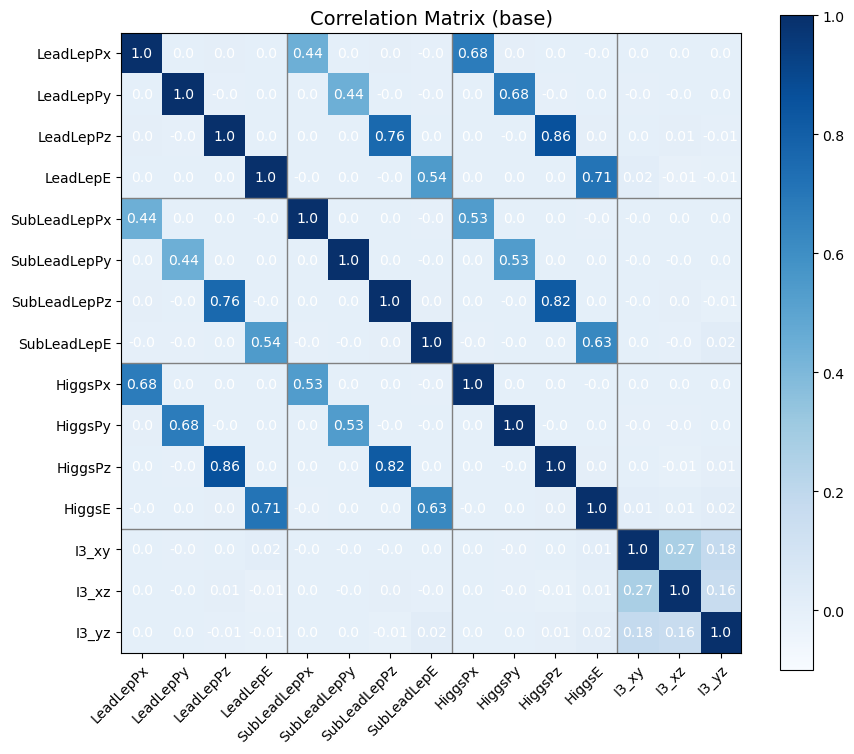

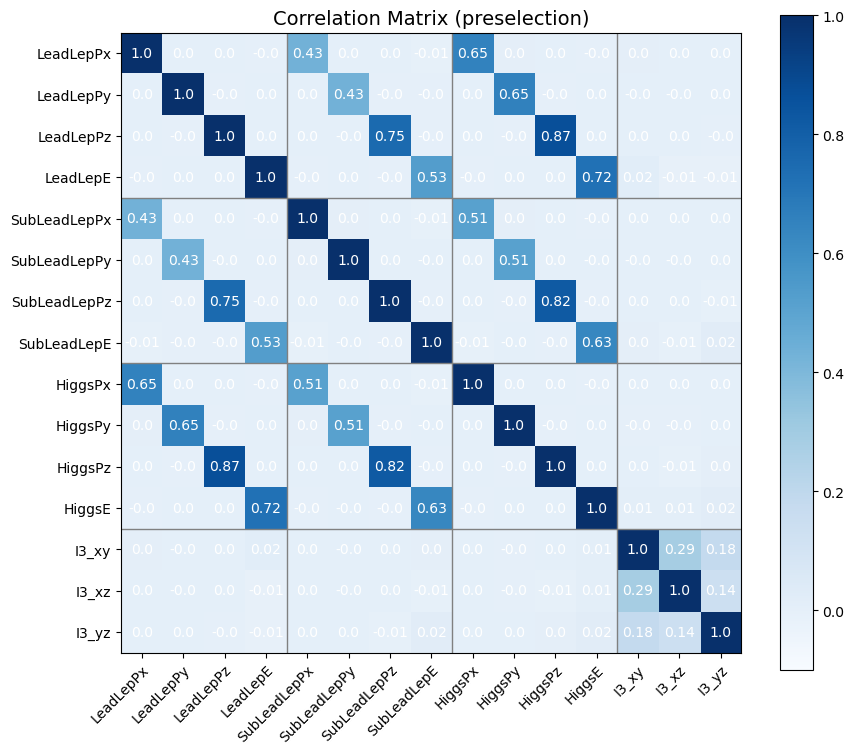

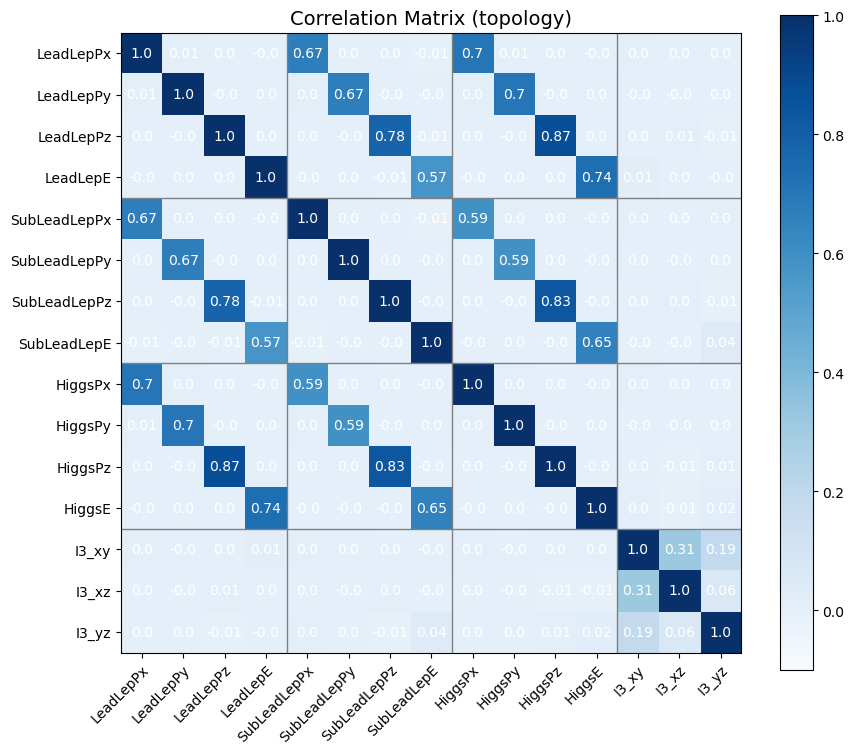

In [13]:
# plot correlation matrix

dd = [base_df, preselect_df, topology_df]
dd_name = ["base", "preselection", "topology"]
for i, j in zip(dd, dd_name):
    corr_matrix(i, j)


In [14]:
def plot_2d(
    data_x: np.ndarray,
    data_y: np.ndarray,
    xlabel: str,
    ylabel: str,
    unit="null",
    filename="sample_test",
    rang_2d=(0, 0),
    crange=[],
    bins=80,
    save=False,
) -> None:
    size = np.min([len(data_x), len(data_y)])
    # data selection (random)
    data = [data_x, data_y]
    _data = []
    for i in data:
        np.random.seed(1234)
        _data.append(np.random.choice(i, size=size))
    _data_x, _data_y = _data
    if rang_2d == (0, 0):
        rang_min = (np.min(_data_x), np.min(_data_y))
        rang_max = (np.max(_data_x), np.max(_data_y))
    else:
        rang_min = (rang_2d[0][0], rang_2d[1][0])
        rang_max = (rang_2d[0][1], rang_2d[1][1])

    # 2d histogram
    hp = atlas.ATLAShist(rang_min, rang_max, bins, "Bell", "HWW", f"CGLMP2D_{filename}")
    hp.set_data([_data_x, _data_y])
    hp.set_graph(xlabel=xlabel, ylabel=ylabel, unit=unit, lib_name="Simulation")
    if len(crange) != 0:
        hp.histfill_2d(
            filename=filename,
            fig_size=(10, 8),
            dpi=120,
            show=True,
            dump=save,
            loc=0,
            cmin=crange[0],
            cmax=crange[1],
        )
    else:
        hp.histfill_2d(
            filename=filename,
            fig_size=(10, 8),
            dpi=120,
            show=True,
            dump=save,
            loc=0,
        )

    return


In [15]:
def plot(
    data1: np.ndarray,
    data2: np.ndarray,
    data3: np.ndarray,
    label: list,
    title: str,
    name: str,
    interval: list = [],
    binNum: int = 50,
    loc: int = 4,
    avg=False,
    plot3=False,
    save=False,
) -> None:
    data1_min = np.min(data1)
    data2_min = np.min(data2)
    data3_min = np.max(data3)
    data1_max = np.max(data1)
    data2_max = np.max(data2)
    data3_max = np.max(data3)

    if interval == []:
        maxi = np.max([data1_max, data2_max, data3_max])
        mini = np.min([data1_min, data2_min, data3_min])
        print("use default range.")
    else:
        mini, maxi = interval

    hp = atlas.ATLAShist(mini, maxi, binNum, "Bell", "HWW", title)
    hp.set_data([data1, data2, data3])
    hp.set_graph(
        color=["blue", "green", "red"],
        xlabel=title,
        ylabel="Events",
        lib_name="Simulation",
    )
    hp.histfill_1d(
        plottype="step",
        filename=name,
        legend_name=[label[0], label[1], label[2]],
        show=True,
        dump=save,
        loc=loc,
    )

    data = [data1, data2, data3]
    if avg == True:
        for i, d in enumerate(data):
            print(
                f"""
            The average of {name} with cut {label[i]} is {np.average(d):.5} \u00B1 {stats.sem(d):.5}
            """
            )

    if plot3 == True:
        hp = atlas.ATLAShist(
            np.min([data1_min, data2_min]),
            np.max([data1_max, data1_max]),
            binNum,
            "Bell",
            "HWW",
            title,
        )
        hp.set_data([data1, data2])
        hp.set_graph(
            color=["red", "green"], lib_name="Simulation", xlabel=title, ylabel="Events"
        )
        hp.histfill_1d(
            plottype="step",
            filename=name + "3-1",
            legend_name=[label[0], label[1]],
            show=True,
            dump=save,
            loc=loc,
        )

        hp = atlas.ATLAShist(
            np.min([data2_min, data3_min]),
            np.max([data2_max, data3_max]),
            binNum,
            "Bell",
            "HWW",
            title,
        )
        hp.set_data([data2, data3])
        hp.set_graph(
            color=["red", "blue"], lib_name="Simulation", xlabel=title, ylabel="Events"
        )
        hp.histfill_1d(
            plottype="step",
            filename=name + "3-2",
            legend_name=[label[1], label[2]],
            show=True,
            dump=save,
            loc=loc,
        )

        hp = atlas.ATLAShist(
            np.min([data1_min, data3_min]),
            np.max([data1_max, data3_max]),
            binNum,
            "Bell",
            "HWW",
            title,
        )
        hp.set_data([data1, data3])
        hp.set_graph(
            color=["red", "blue"], lib_name="Simulation", xlabel=title, ylabel="Events"
        )
        hp.histfill_1d(
            plottype="step",
            filename=name + "3-3",
            legend_name=[label[0], label[2]],
            show=True,
            dump=save,
            loc=loc,
        )

    plt.close()

    return


In [16]:
# Data1, Data2, Data3
label = ["base", "preseletion", "topology"]


In [17]:
# pt eta phi plot

# Lead
# plot(base_sig_Lpt, preselect_sig_Lpt, topology_sig_Lpt, label, r'$p_{t}^{l0}$', 'sig_ledLep_pt', binNum=100, save=True, plot3=False)
# plot(base_sig_Leta, preselect_sig_Leta, topology_sig_Leta, label, r'$\eta^{l0}$', 'sig_ledLep_eta', binNum=80, save=True)
# plot(base_sig_Lphi, preselect_sig_Lphi, topology_sig_Lphi, label, r'$\phi^{l0}$', 'sig_ledLep_phi', binNum=80, save=True)

# # Sublead
# plot(base_sig_Spt, preselect_sig_Spt, topology_sig_Spt, label, r'$p_{t}^{l1}$', 'sig_subLep_pt', binNum=80, save=True)
# plot(base_sig_Seta, preselect_sig_Seta, topology_sig_Seta, label, r'$\eta^{l1}$', 'sig_subLep_eta', binNum=80, save=True)
# plot(base_sig_Sphi, preselect_sig_Sphi, topology_sig_Sphi, label, r'$\phi^{l1}$', 'sig_subLep_phi', binNum=80, save=True)


In [18]:
# # 2d plot, correlation test
# plot_2d(
#     base_sig_Lpz,
#     base_sig_Lpz,
#     bins=100,
#     rang_2d=((-100, 100), (-100, 100)),
#     xlabel=r"$p_{z}^{l0}\ _{base}$",
#     ylabel=r"$p_{z}^{l0}\ _{base}$",
#     unit="GeV",
# )

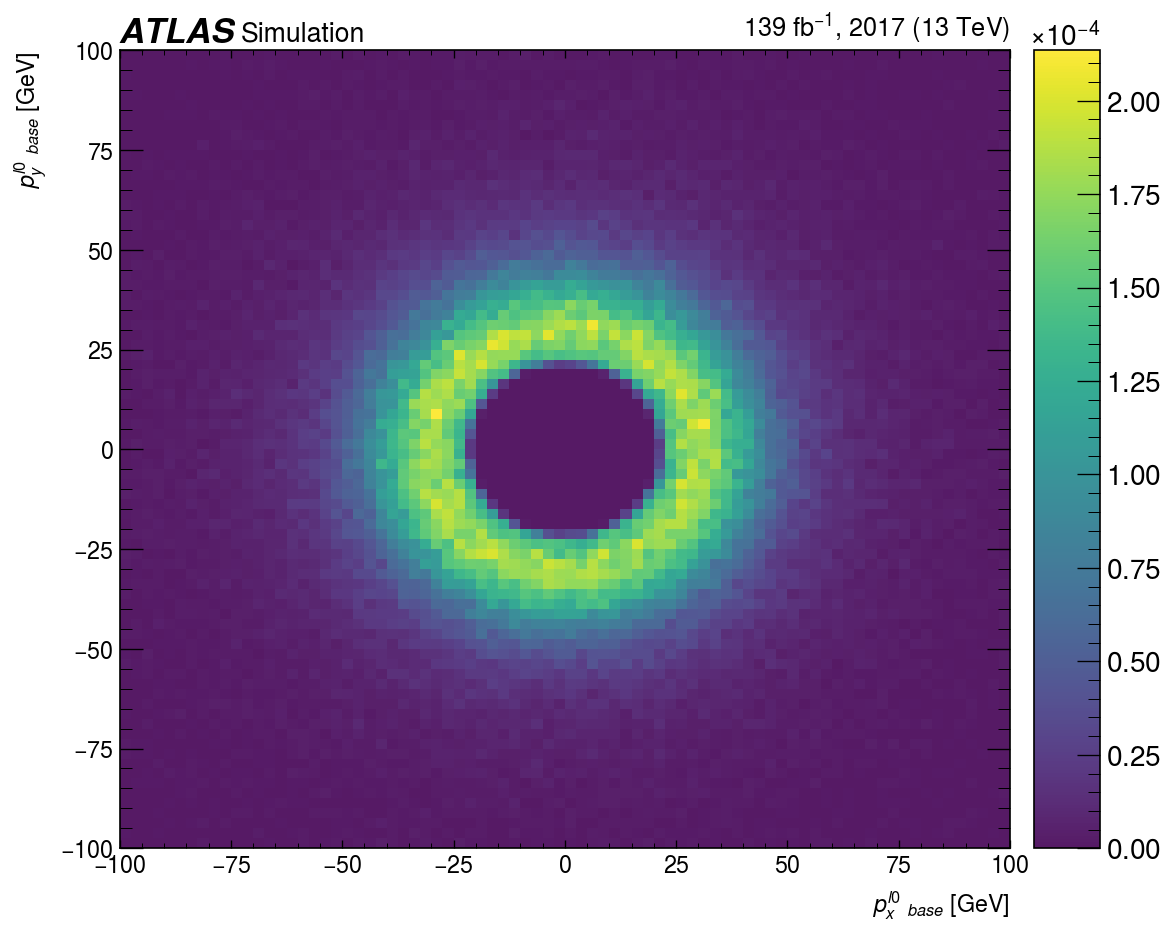

2D, Finish!


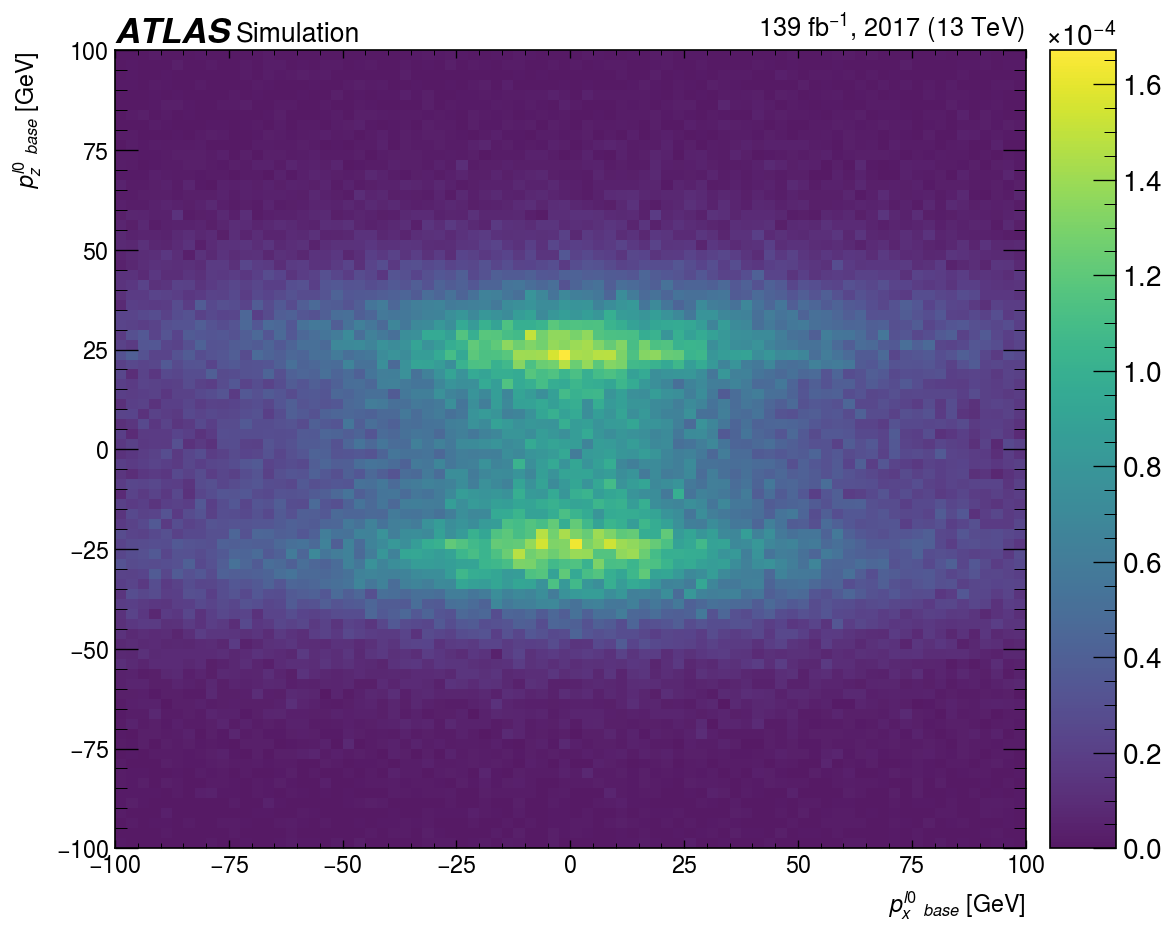

2D, Finish!


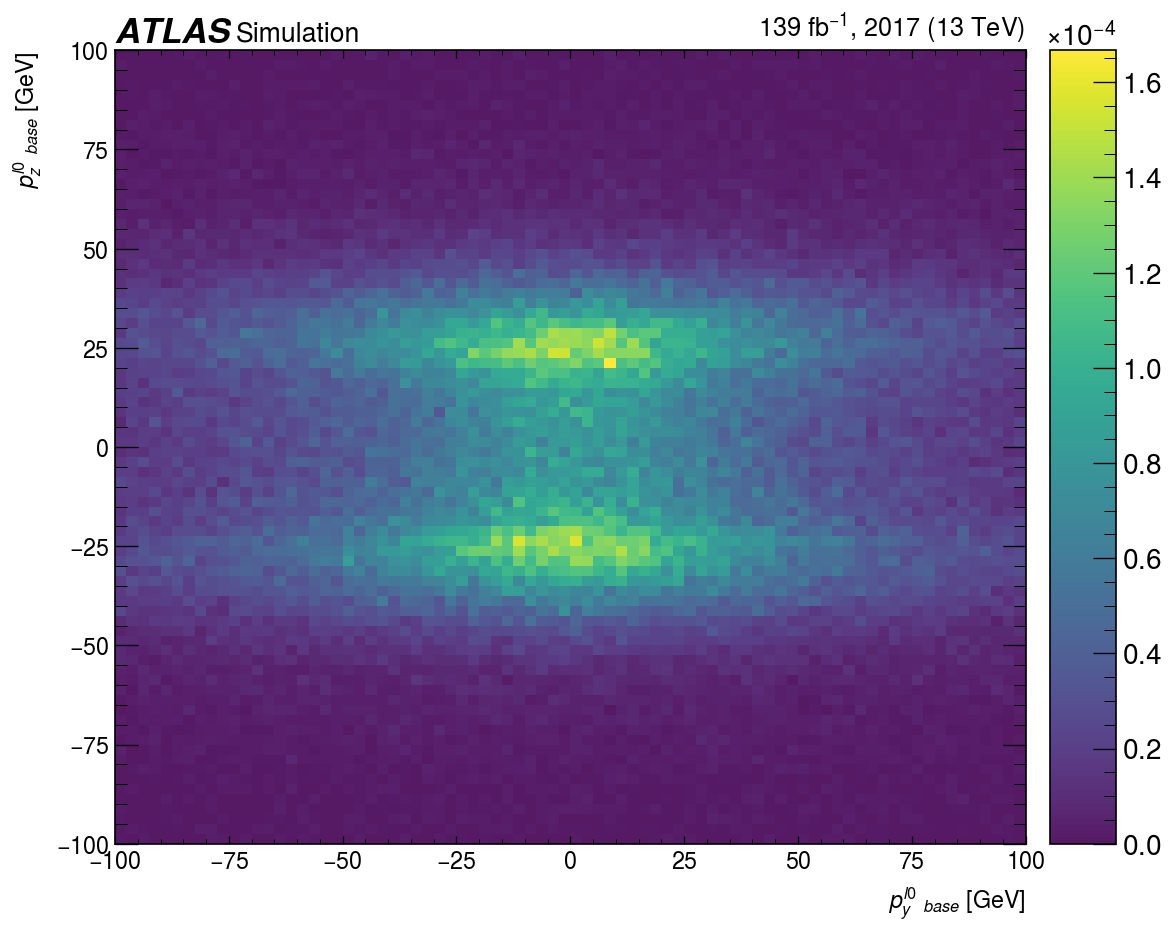

2D, Finish!


In [19]:
# Leading leptons 2d plot

plot_2d(
    base_sig_Lpx,
    base_sig_Lpy,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{x}^{l0}\ _{base}$",
    ylabel=r"$p_{y}^{l0}\ _{base}$",
    unit="GeV",
)
plot_2d(
    base_sig_Lpx,
    base_sig_Lpz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{x}^{l0}\ _{base}$",
    ylabel=r"$p_{z}^{l0}\ _{base}$",
    unit="GeV",
)
plot_2d(
    base_sig_Lpy,
    base_sig_Lpz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{y}^{l0}\ _{base}$",
    ylabel=r"$p_{z}^{l0}\ _{base}$",
    unit="GeV",
)


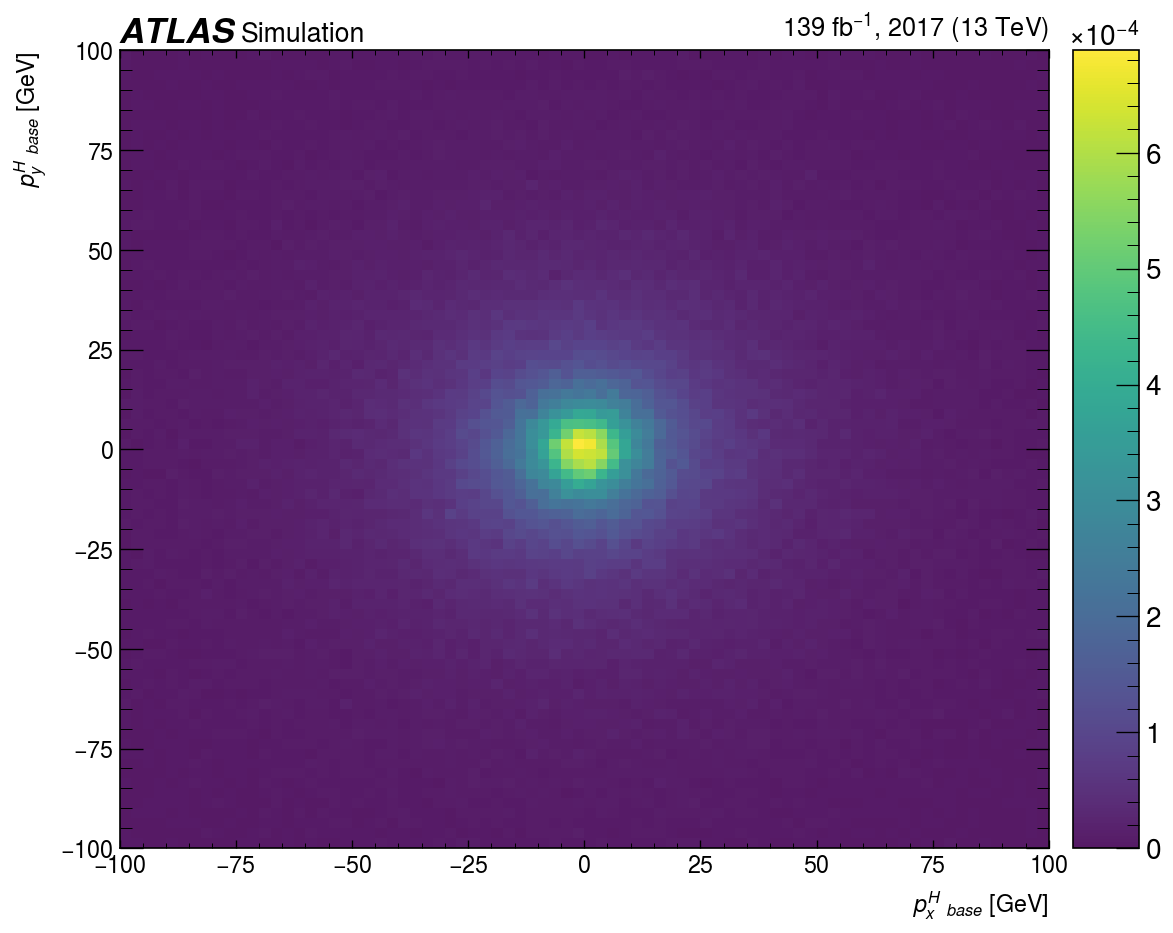

2D, Finish!


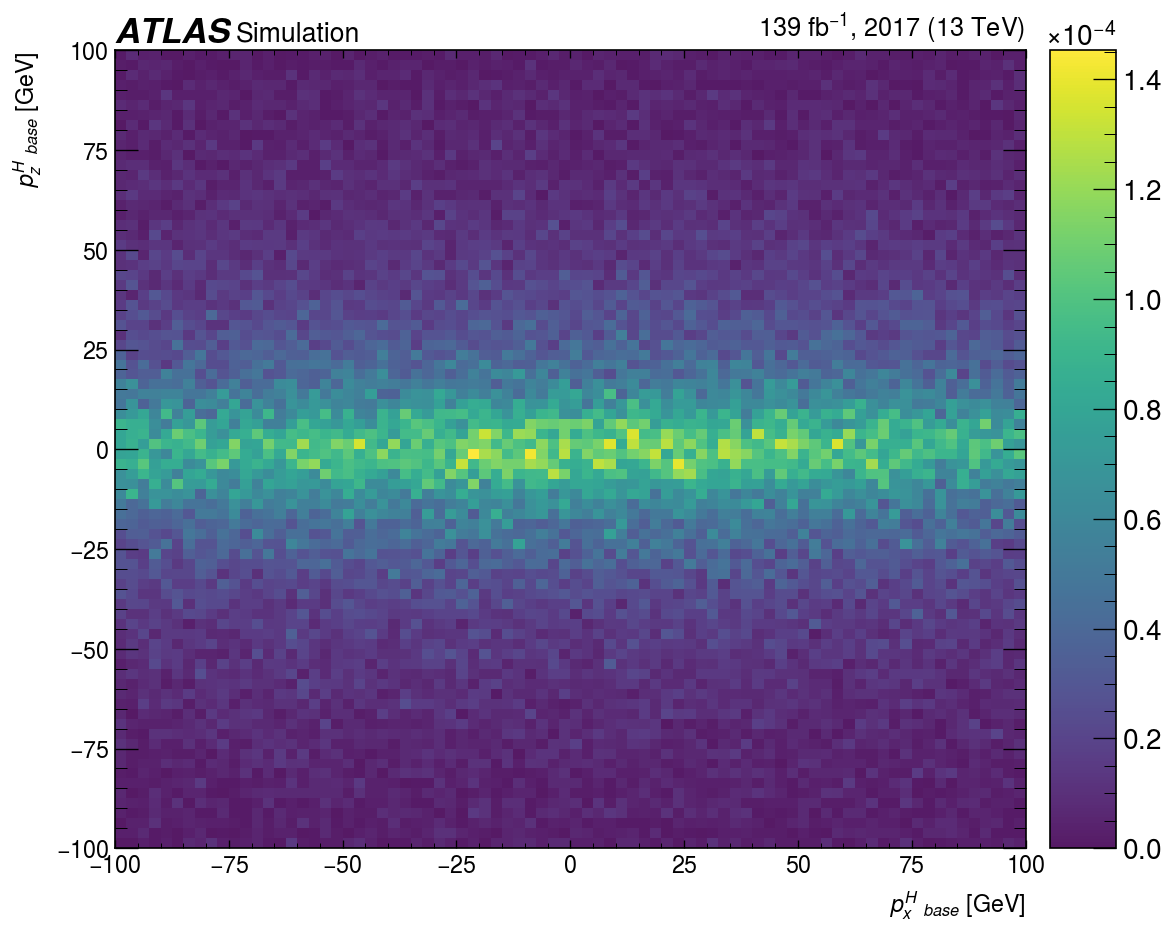

2D, Finish!


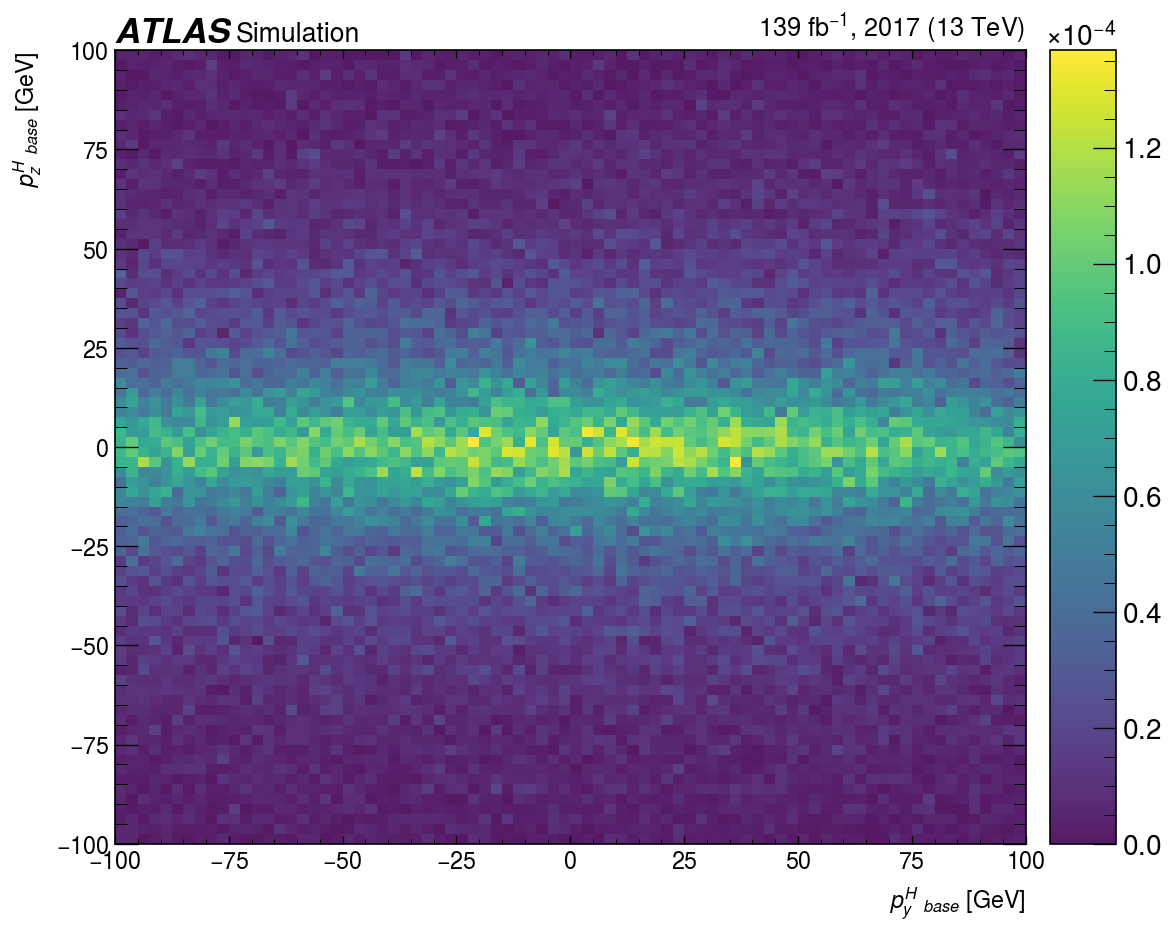

2D, Finish!


In [20]:
# Higgs 2d plot

plot_2d(
    base_sig_Hpx,
    base_sig_Hpy,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{x}^{H}\ _{base}$",
    ylabel=r"$p_{y}^{H}\ _{base}$",
    unit="GeV",
)
plot_2d(
    base_sig_Hpx,
    base_sig_Hpz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{x}^{H}\ _{base}$",
    ylabel=r"$p_{z}^{H}\ _{base}$",
    unit="GeV",
)
plot_2d(
    base_sig_Hpy,
    base_sig_Hpz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{y}^{H}\ _{base}$",
    ylabel=r"$p_{z}^{H}\ _{base}$",
    unit="GeV",
)


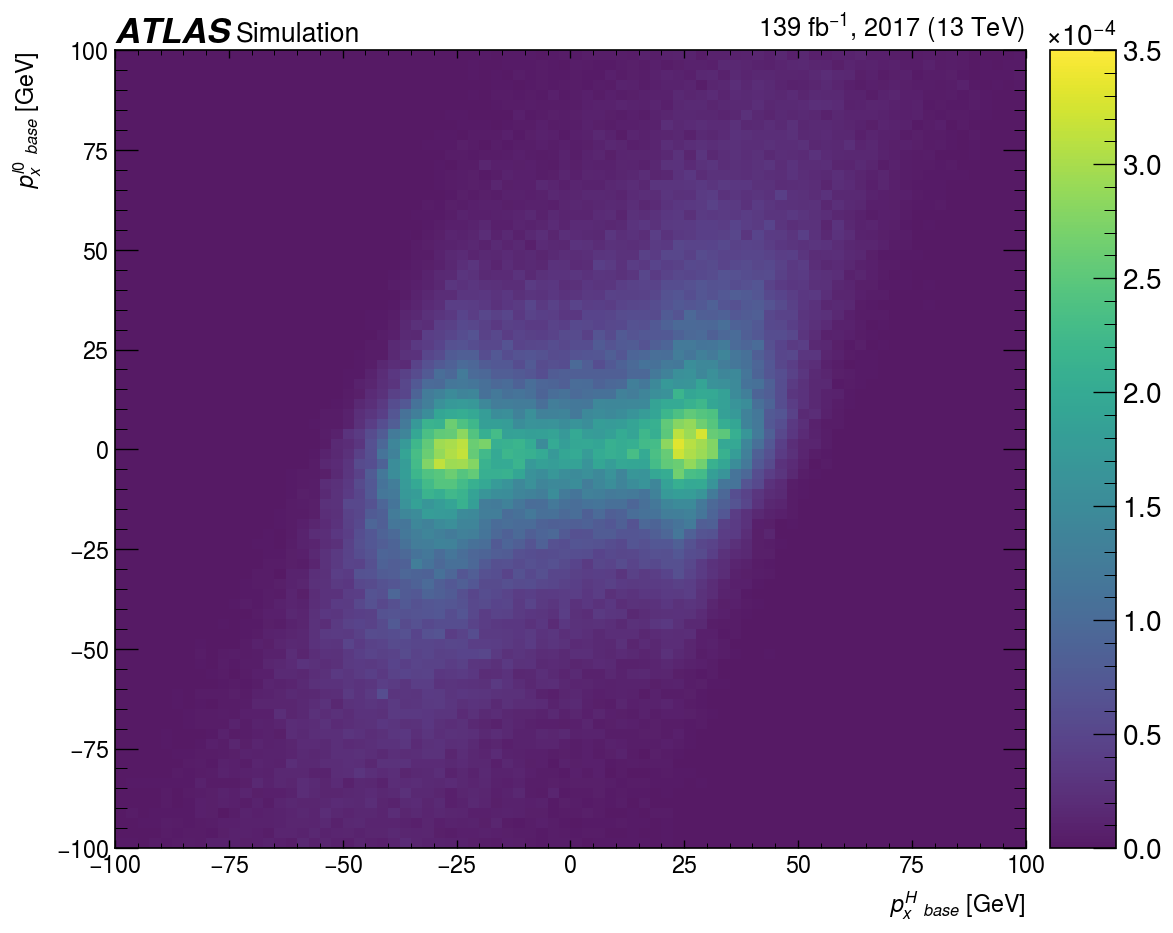

2D, Finish!


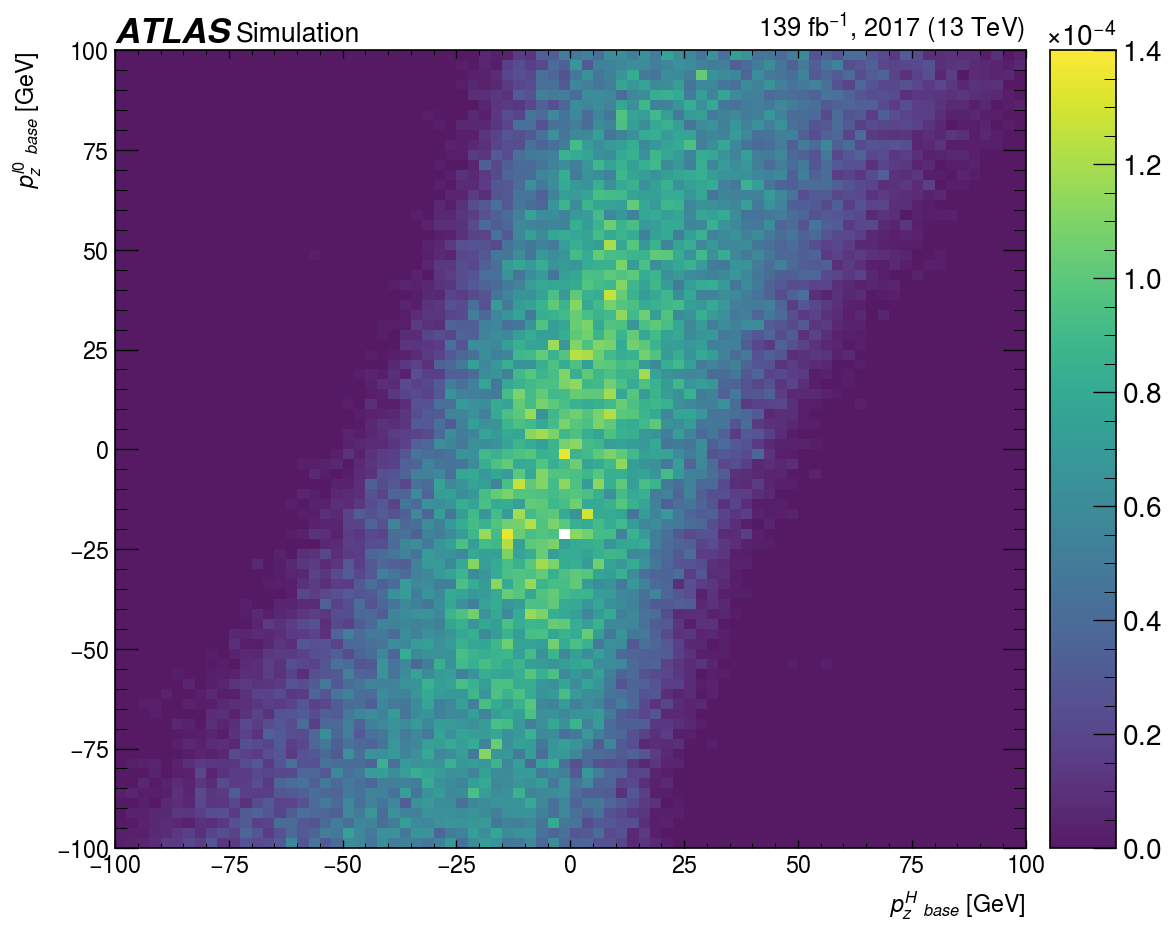

2D, Finish!


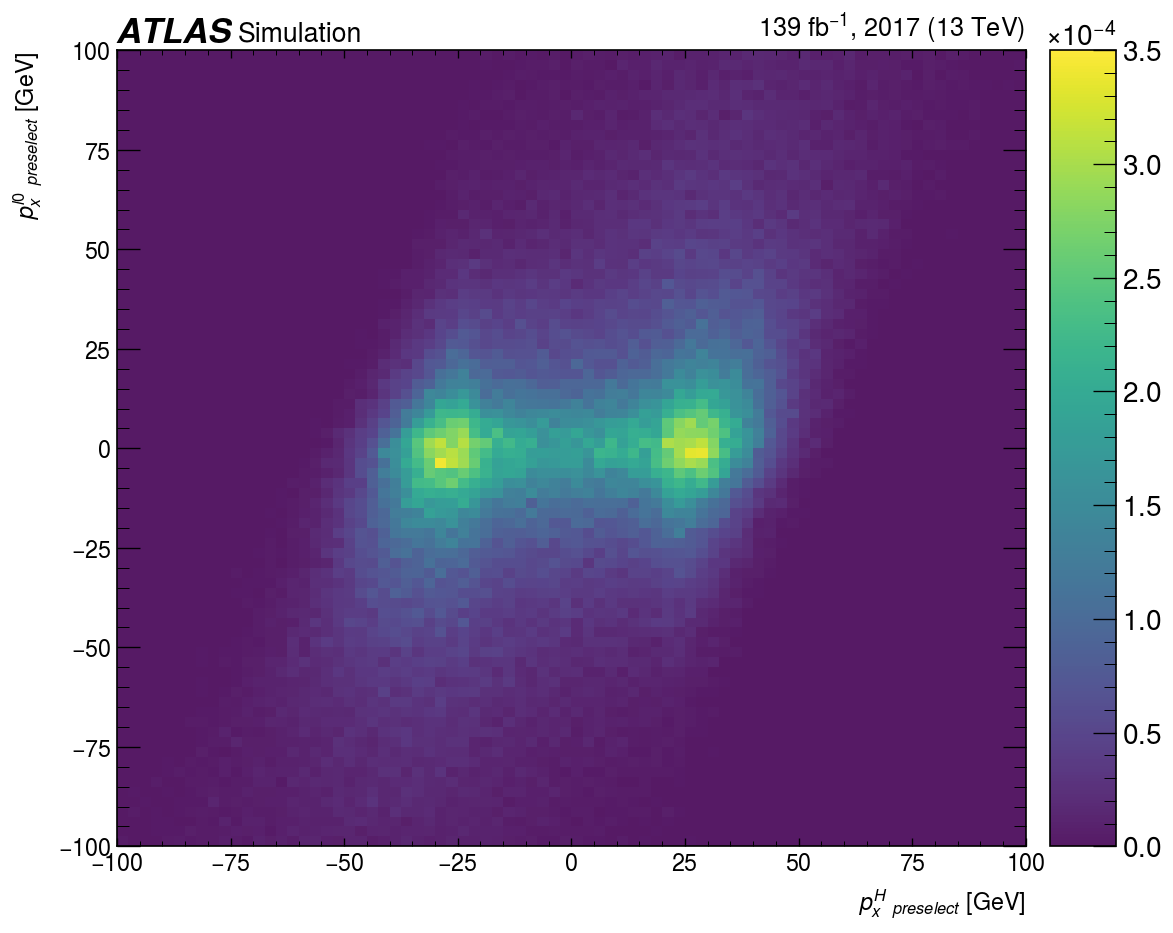

2D, Finish!


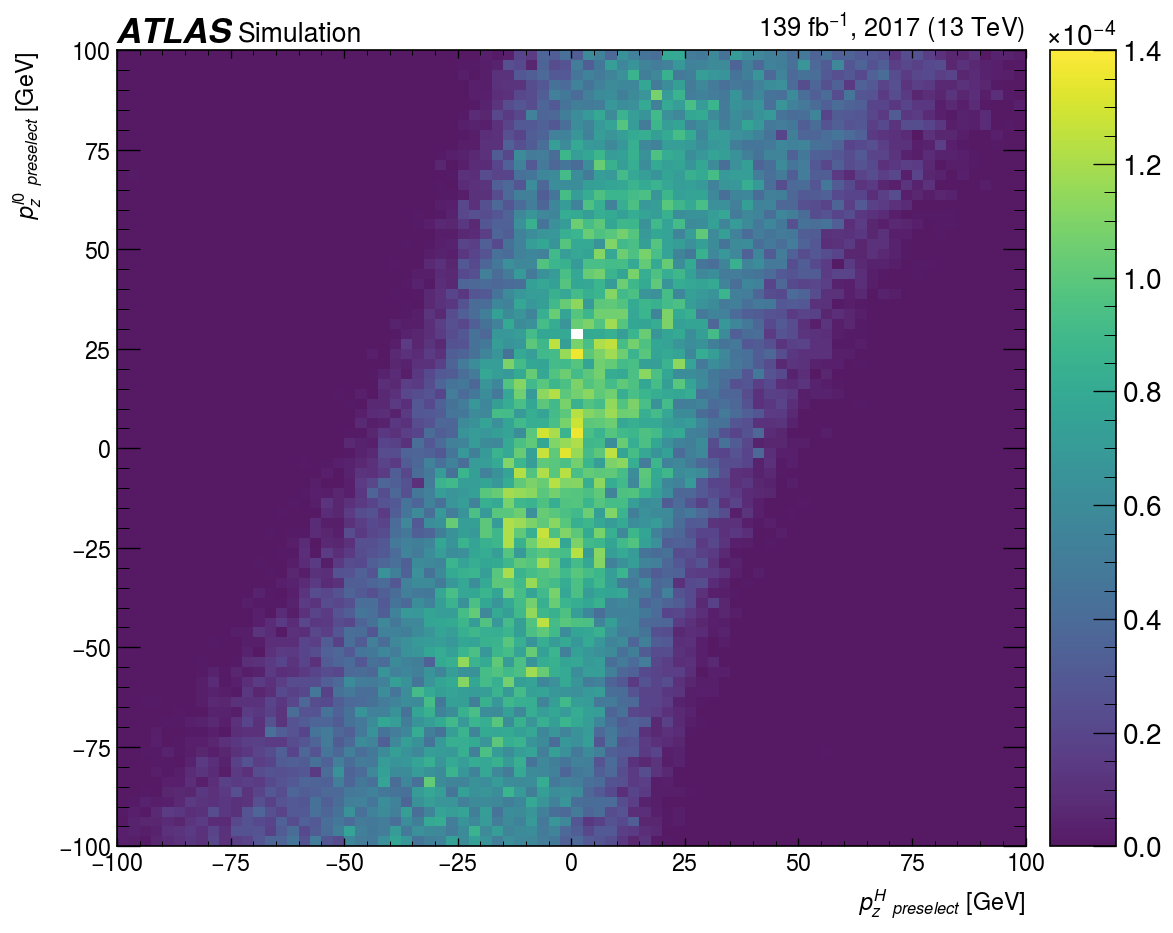

2D, Finish!


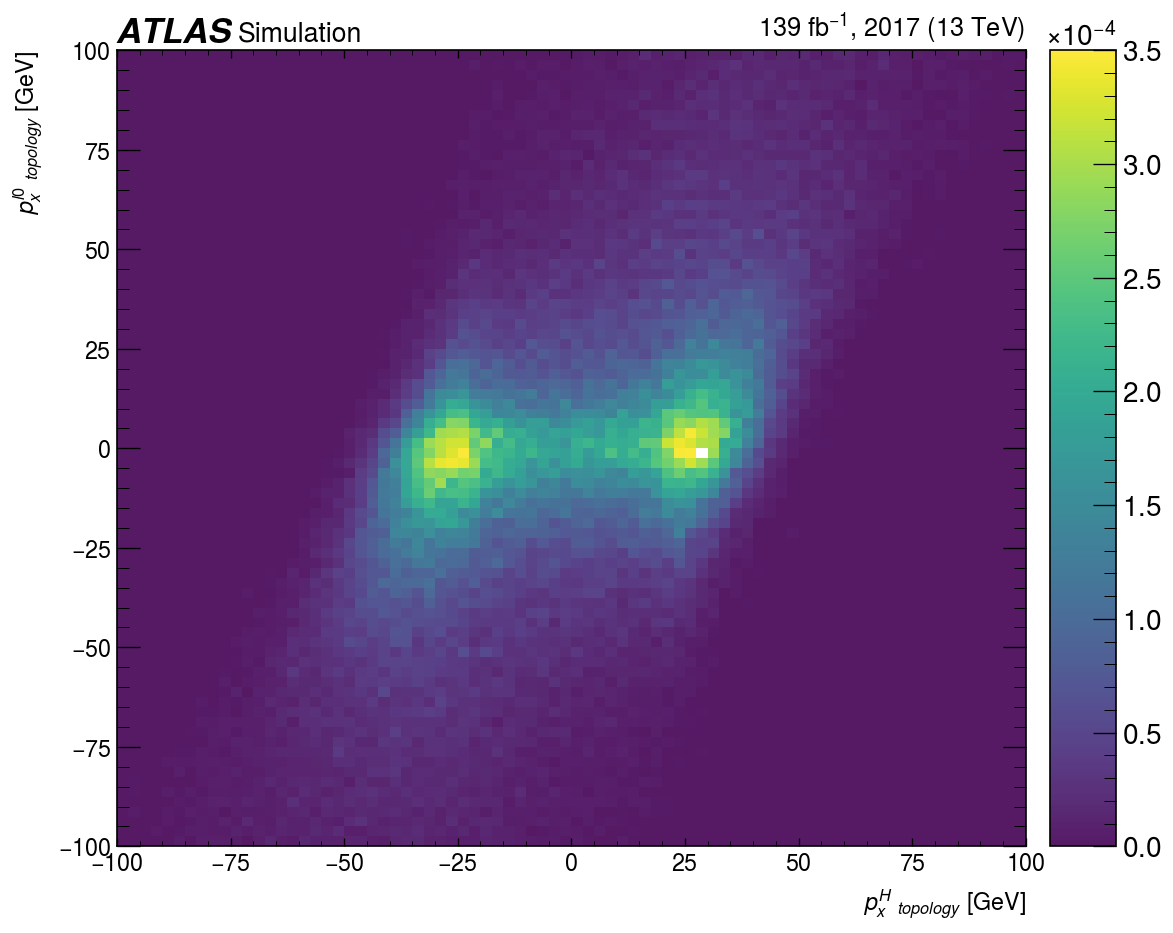

2D, Finish!


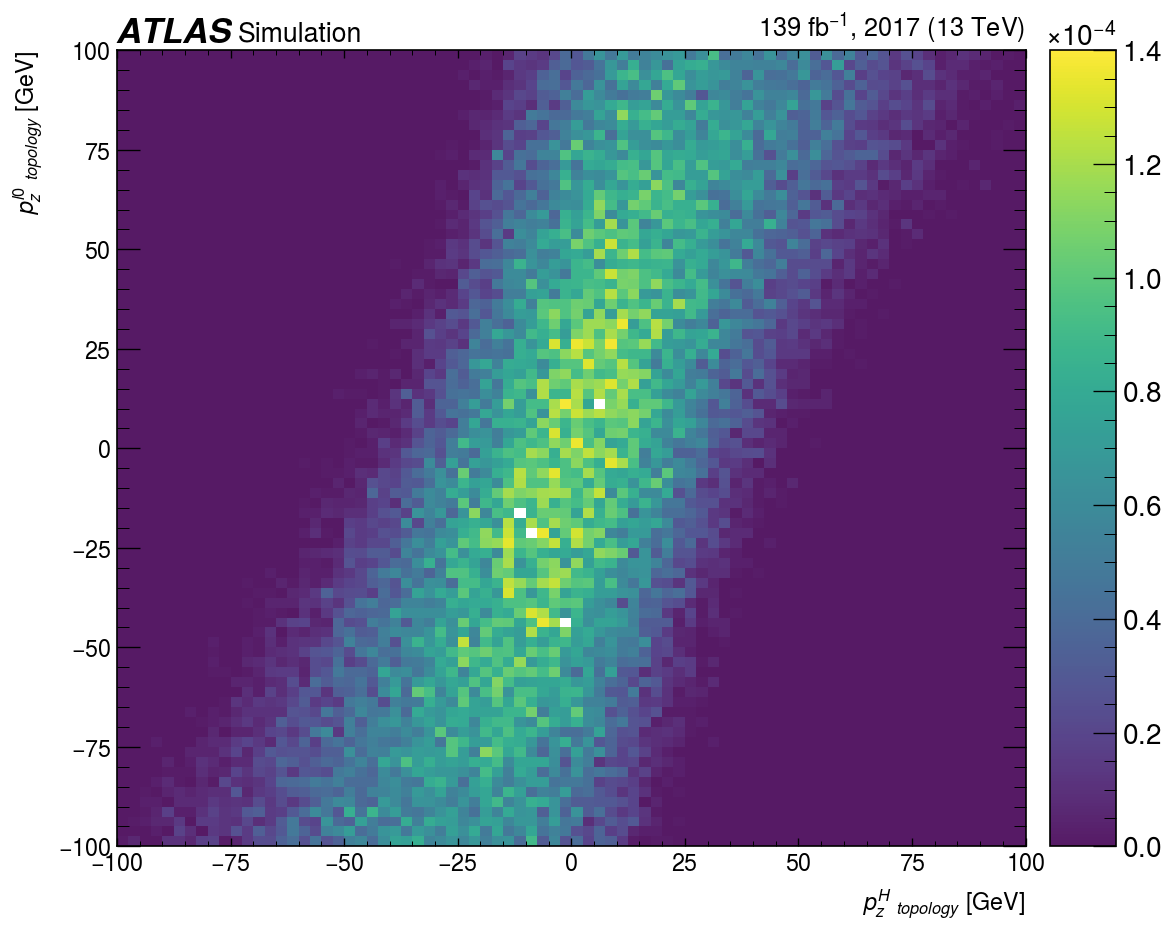

2D, Finish!


In [21]:
# kinematic 2d histogram

plot_2d(
    base_sig_Hpx,
    base_sig_Lpx,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 3.5e-4],
    xlabel=r"$p_{x}^{H}\ _{base}$",
    ylabel=r"$p_{x}^{l0}\ _{base}$",
    unit="GeV",
)
plot_2d(
    base_sig_Hpz,
    base_sig_Lpz,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 1.4e-4],
    xlabel=r"$p_{z}^{H}\ _{base}$",
    ylabel=r"$p_{z}^{l0}\ _{base}$",
    unit="GeV",
)
plot_2d(
    preselect_sig_Hpx,
    preselect_sig_Lpx,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 3.5e-4],
    xlabel=r"$p_{x}^{H}\ _{preselect}$",
    ylabel=r"$p_{x}^{l0}\ _{preselect}$",
    unit="GeV",
)
plot_2d(
    preselect_sig_Hpz,
    preselect_sig_Lpz,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 1.4e-4],
    xlabel=r"$p_{z}^{H}\ _{preselect}$",
    ylabel=r"$p_{z}^{l0}\ _{preselect}$",
    unit="GeV",
)
plot_2d(
    topology_sig_Hpx,
    topology_sig_Lpx,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 3.5e-4],
    xlabel=r"$p_{x}^{H}\ _{topology}$",
    ylabel=r"$p_{x}^{l0}\ _{topology}$",
    unit="GeV",
)
plot_2d(
    topology_sig_Hpz,
    topology_sig_Lpz,
    rang_2d=((-100, 100), (-100, 100)),
    crange=[0, 1.4e-4],
    xlabel=r"$p_{z}^{H}\ _{topology}$",
    ylabel=r"$p_{z}^{l0}\ _{topology}$",
    unit="GeV",
)

Use two different units


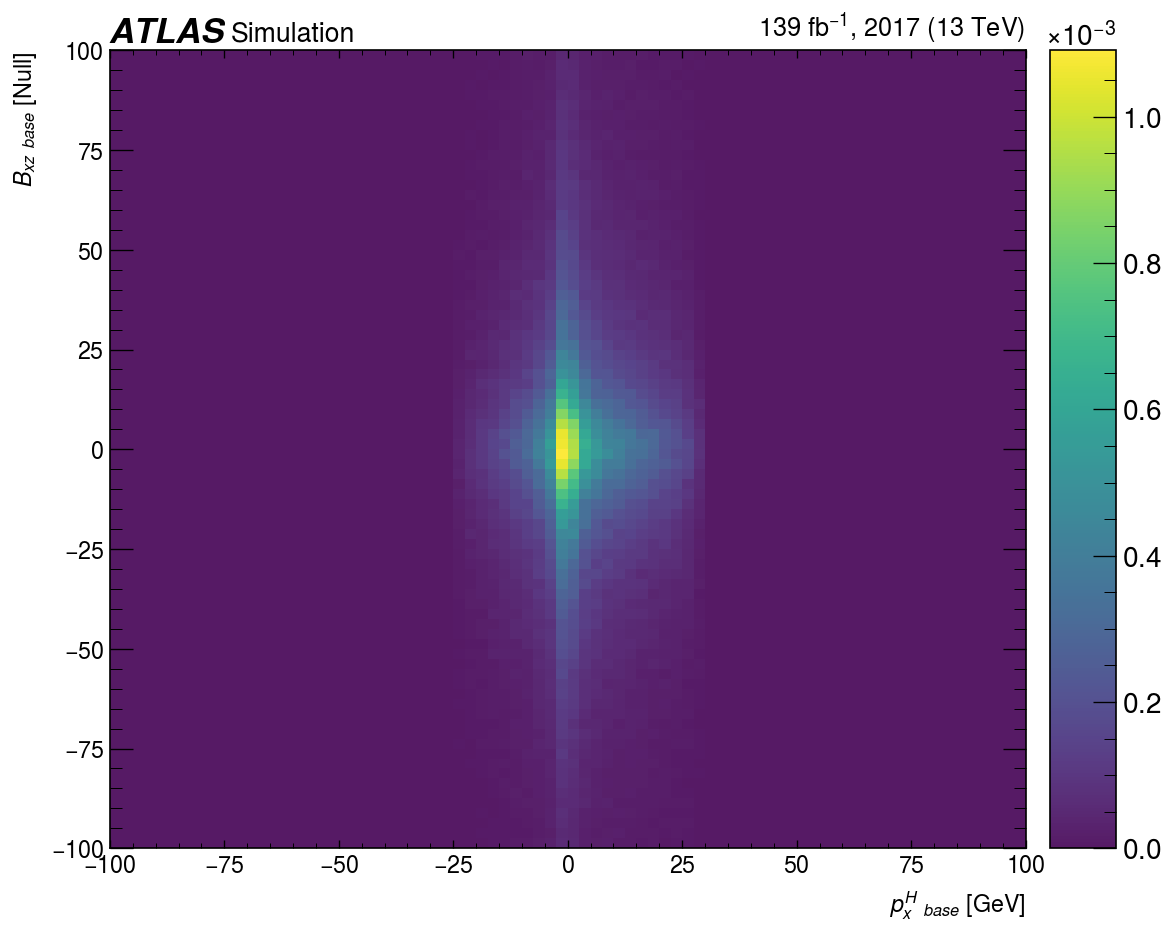

2D, Finish!
Use two different units


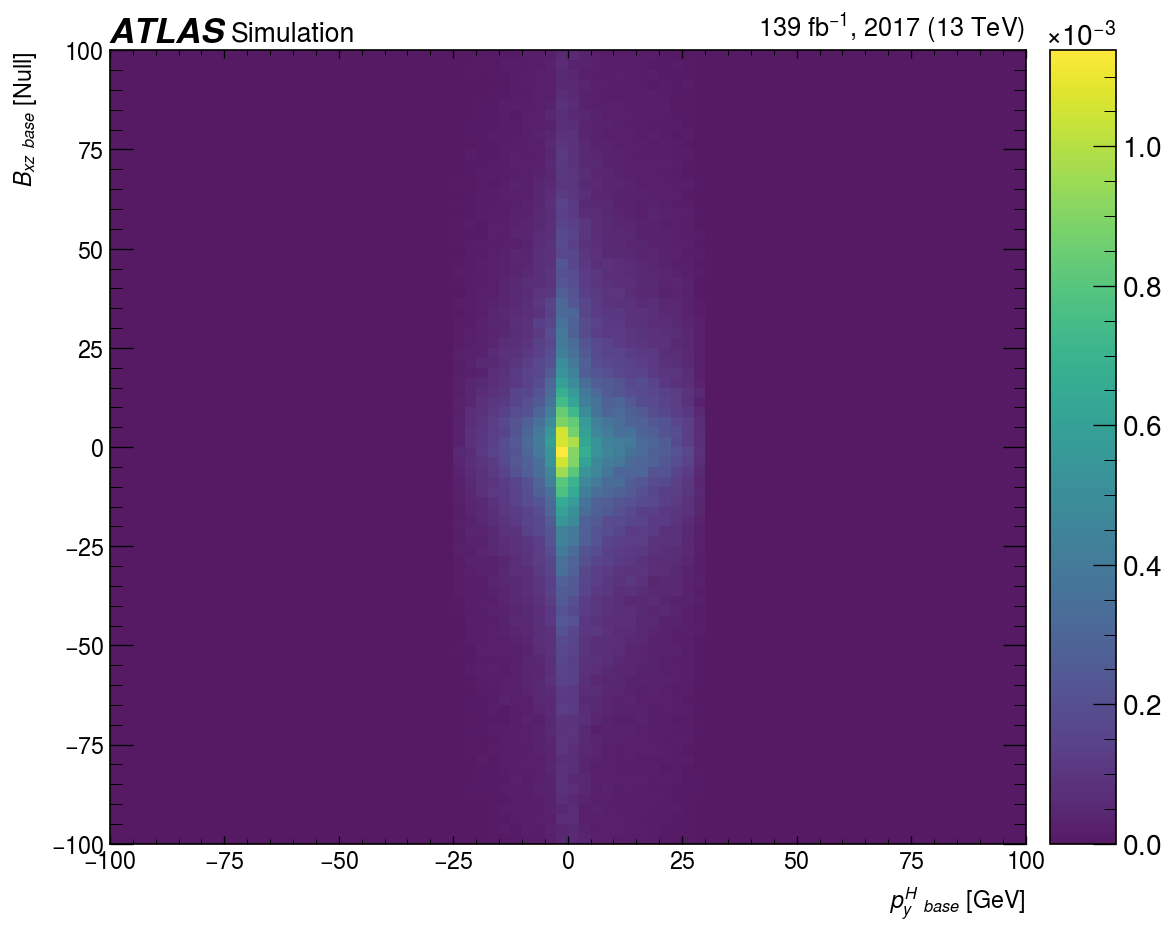

2D, Finish!
Use two different units


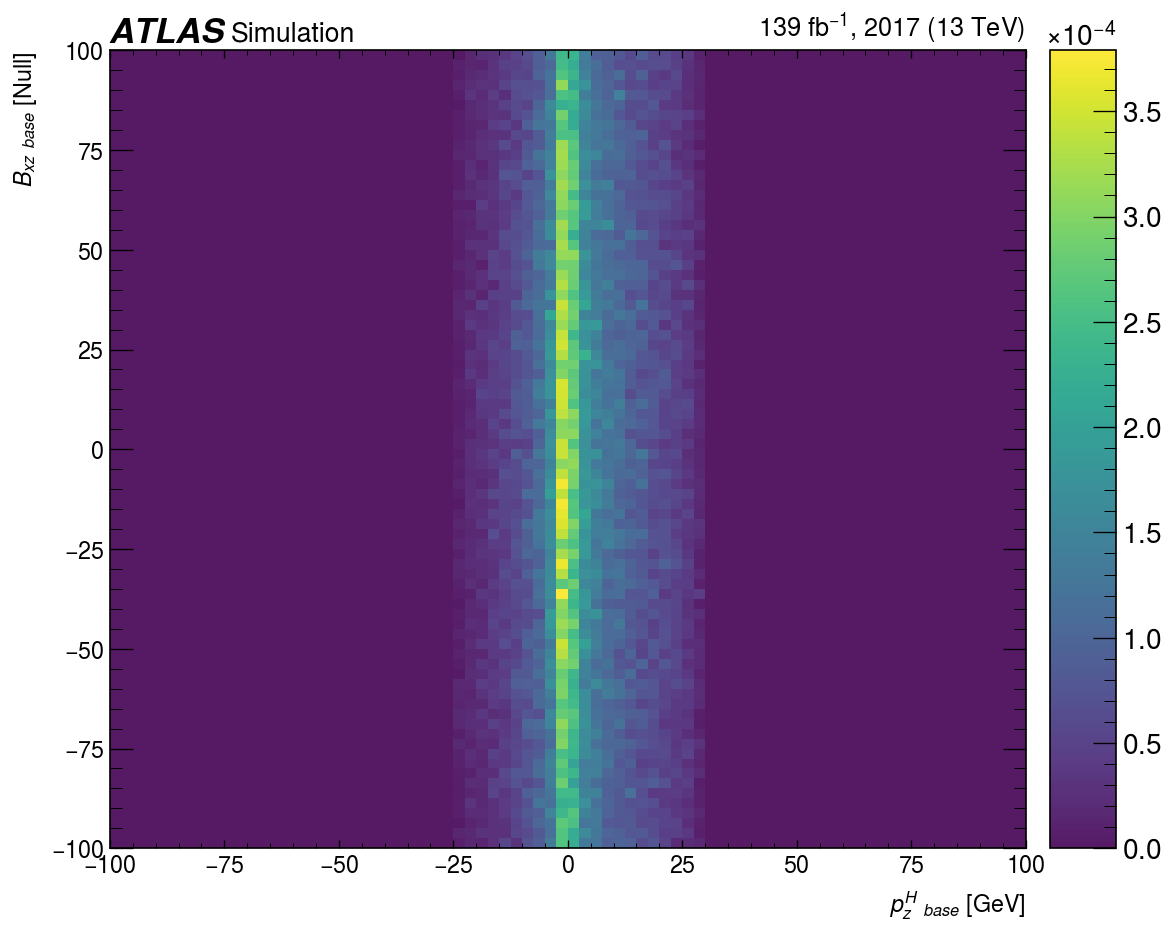

2D, Finish!


In [22]:
# HIggs vs I_3

plot_2d(
    base_sig_Hpx,
    base_sig_Bxz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{x}^{H}\ _{base}$",
    ylabel=r"$B_{xz}\ _{base}$",
    unit=["GeV", "Null"],
)
plot_2d(
    base_sig_Hpy,
    base_sig_Bxz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{y}^{H}\ _{base}$",
    ylabel=r"$B_{xz}\ _{base}$",
    unit=["GeV", "Null"],
)
plot_2d(
    base_sig_Hpz,
    base_sig_Bxz,
    rang_2d=((-100, 100), (-100, 100)),
    xlabel=r"$p_{z}^{H}\ _{base}$",
    ylabel=r"$B_{xz}\ _{base}$",
    unit=["GeV", "Null"],
)


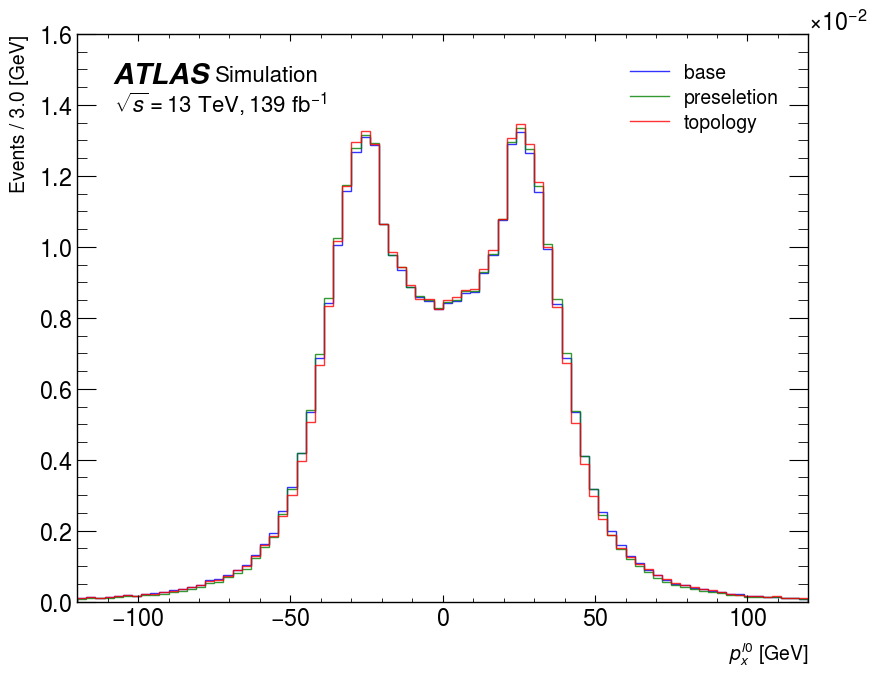

1D, Finish!


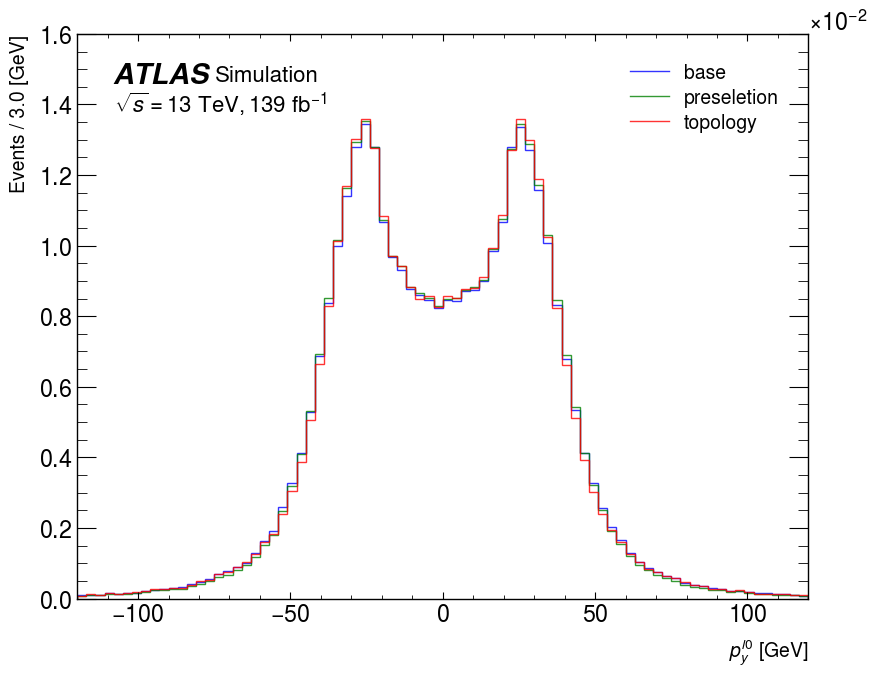

1D, Finish!


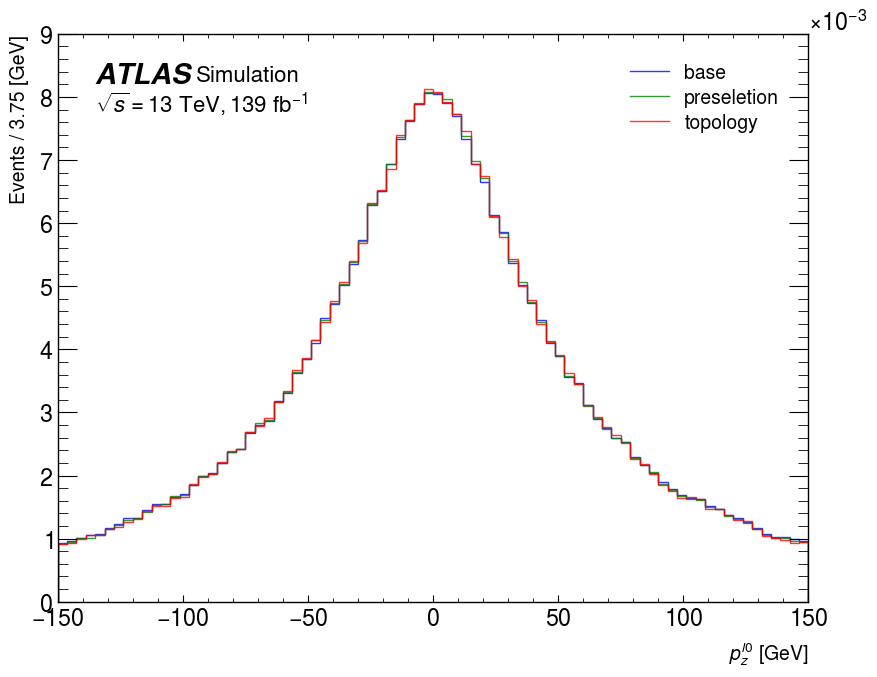

1D, Finish!


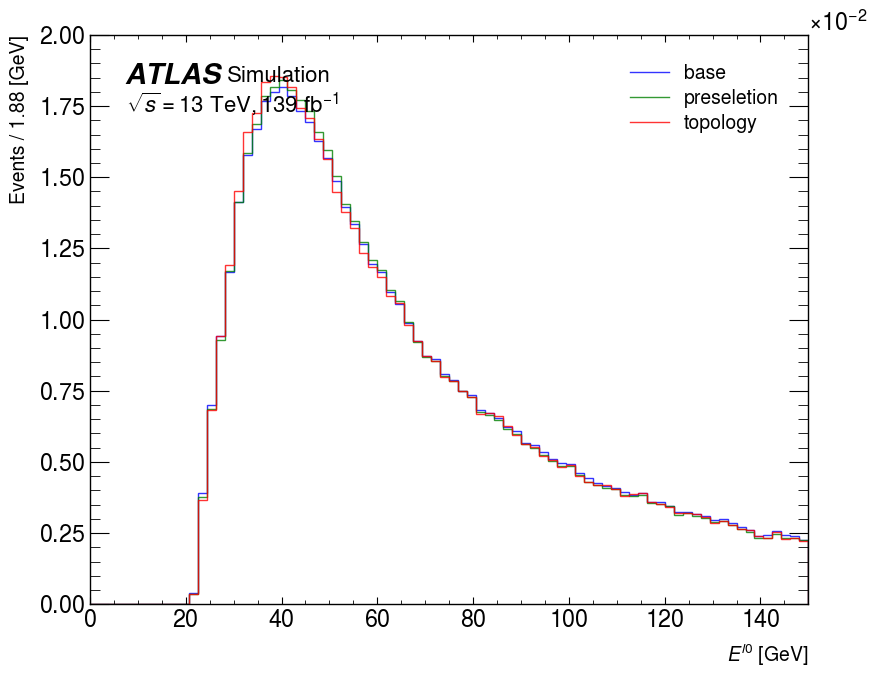

1D, Finish!


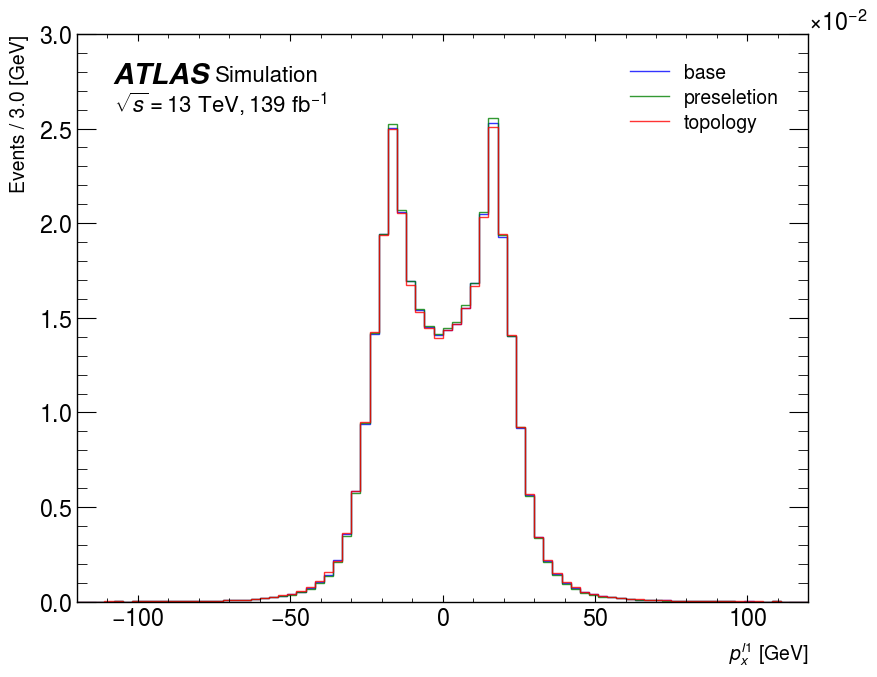

1D, Finish!


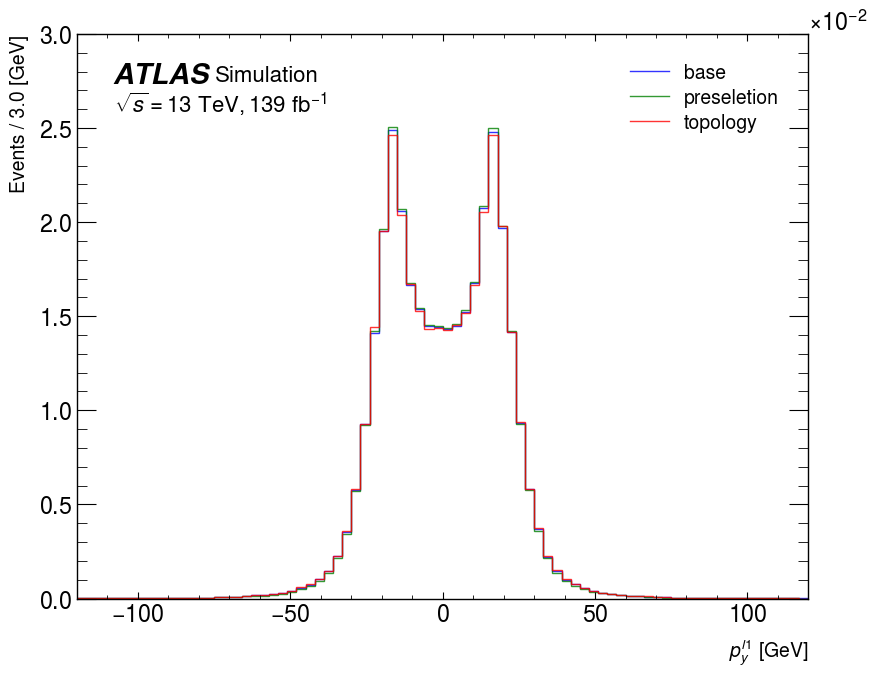

1D, Finish!


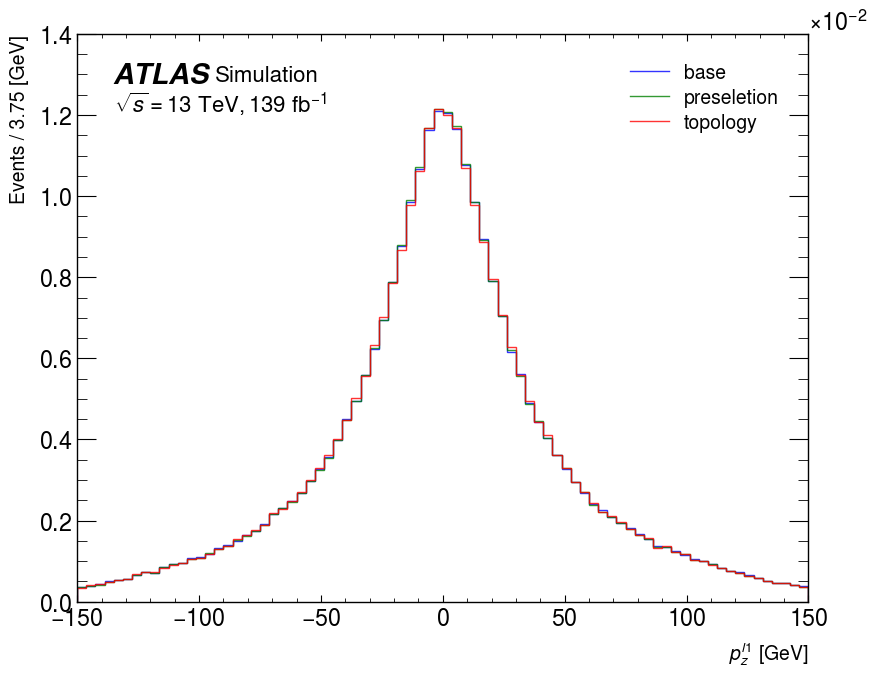

1D, Finish!


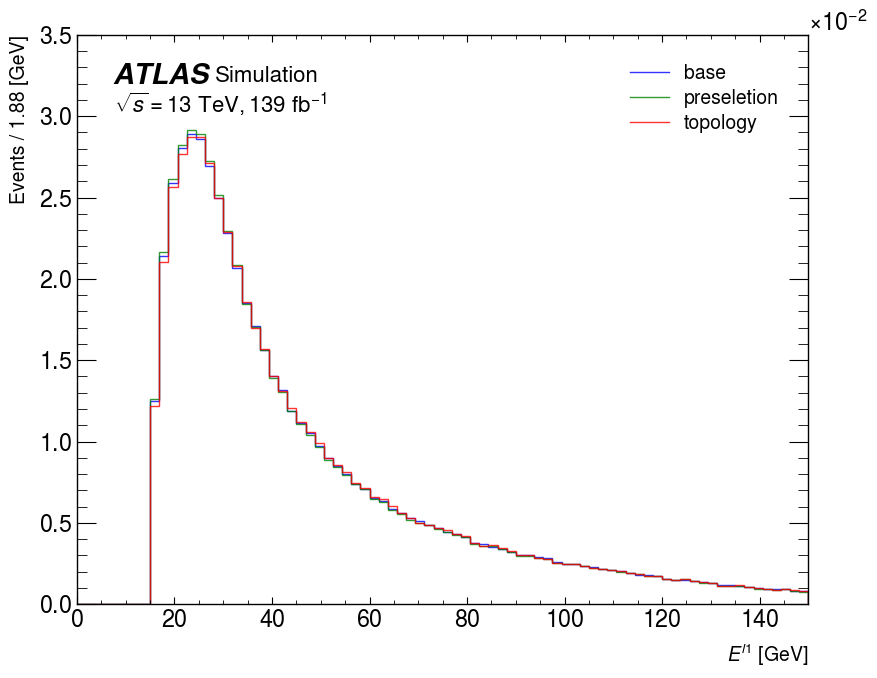

1D, Finish!


In [23]:
"""
px py m
"""

# Lead
plot(
    base_sig_Lpx,
    preselect_sig_Lpx,
    topology_sig_Lpx,
    label,
    r"$p_{x}^{l0}$",
    "sig_ledLep_x",
    interval=[-120, 120],
    binNum=80,
    save=False,
)
plot(
    base_sig_Lpy,
    preselect_sig_Lpy,
    topology_sig_Lpy,
    label,
    r"$p_{y}^{l0}$",
    "sig_ledLep_y",
    interval=[-120, 120],
    binNum=80,
    save=False,
)
plot(
    base_sig_Lpz,
    preselect_sig_Lpz,
    topology_sig_Lpz,
    label,
    r"$p_{z}^{l0}$",
    "sig_ledLep_z",
    interval=[-150, 150],
    binNum=80,
    save=False,
)
plot(
    base_sig_Le,
    preselect_sig_Le,
    topology_sig_Le,
    label,
    r"$E^{l0}$",
    "sig_ledLep_e",
    interval=[0, 150],
    binNum=80,
    save=False,
)

# Sublead
plot(
    base_sig_Spx,
    preselect_sig_Spx,
    topology_sig_Spx,
    label,
    r"$p_{x}^{l1}$",
    "sig_subLep_x",
    interval=[-120, 120],
    binNum=80,
    save=False,
)
plot(
    base_sig_Spy,
    preselect_sig_Spy,
    topology_sig_Spy,
    label,
    r"$p_{y}^{l1}$",
    "sig_subLep_y",
    interval=[-120, 120],
    binNum=80,
    save=False,
)
plot(
    base_sig_Spz,
    preselect_sig_Spz,
    topology_sig_Spz,
    label,
    r"$p_{z}^{l1}$",
    "sig_subLep_z",
    interval=[-150, 150],
    binNum=80,
    save=False,
)
plot(
    base_sig_Se,
    preselect_sig_Se,
    topology_sig_Se,
    label,
    r"$E^{l1}$",
    "sig_subLep_e",
    interval=[0, 150],
    binNum=80,
    save=False,
)


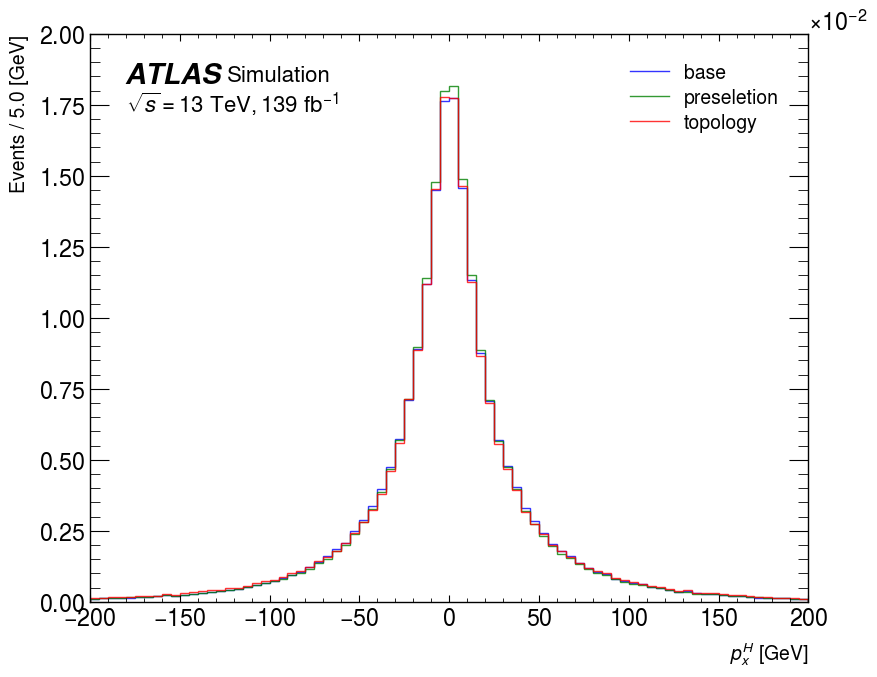

1D, Finish!


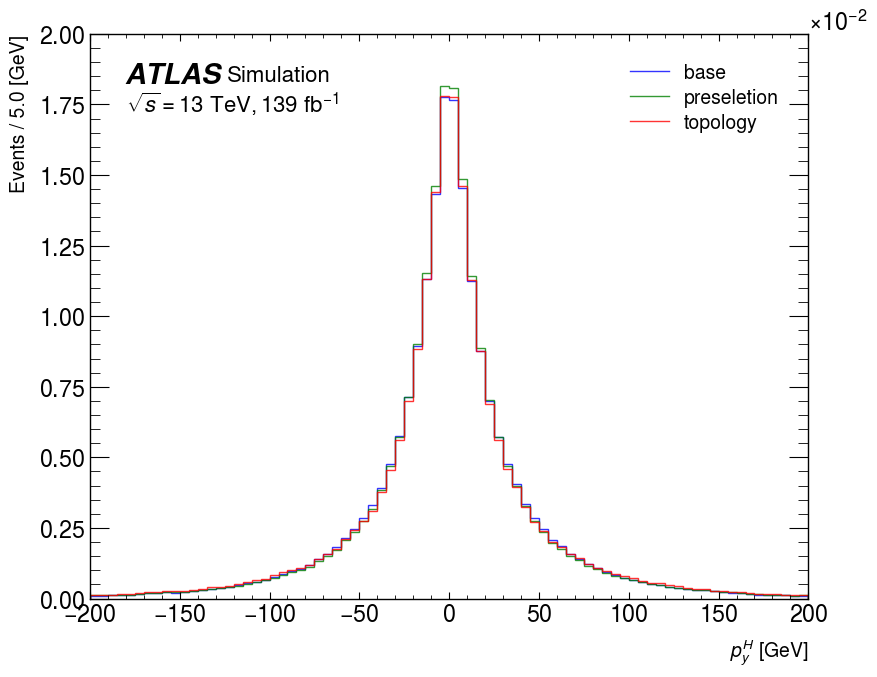

1D, Finish!


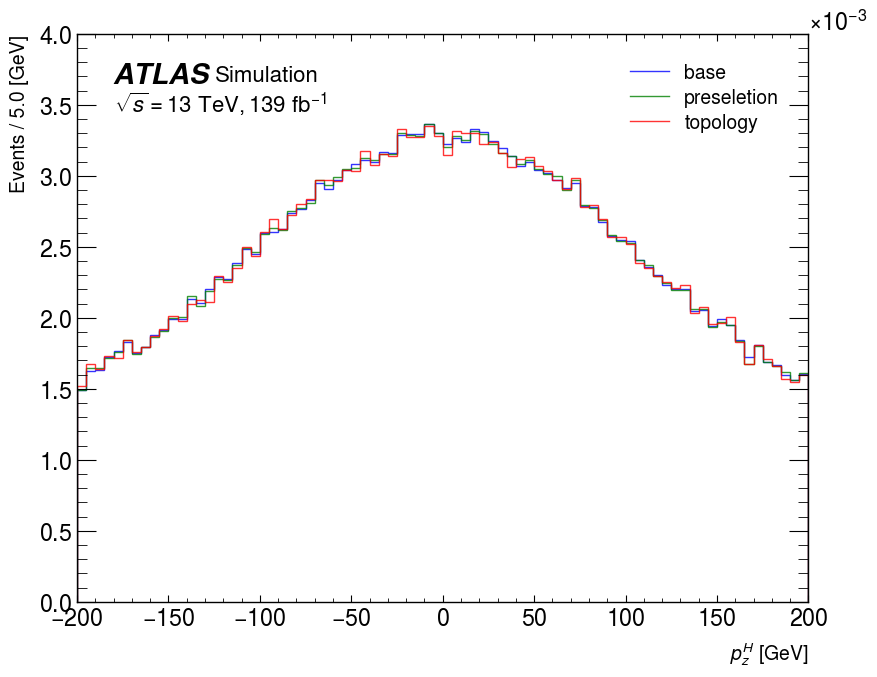

1D, Finish!


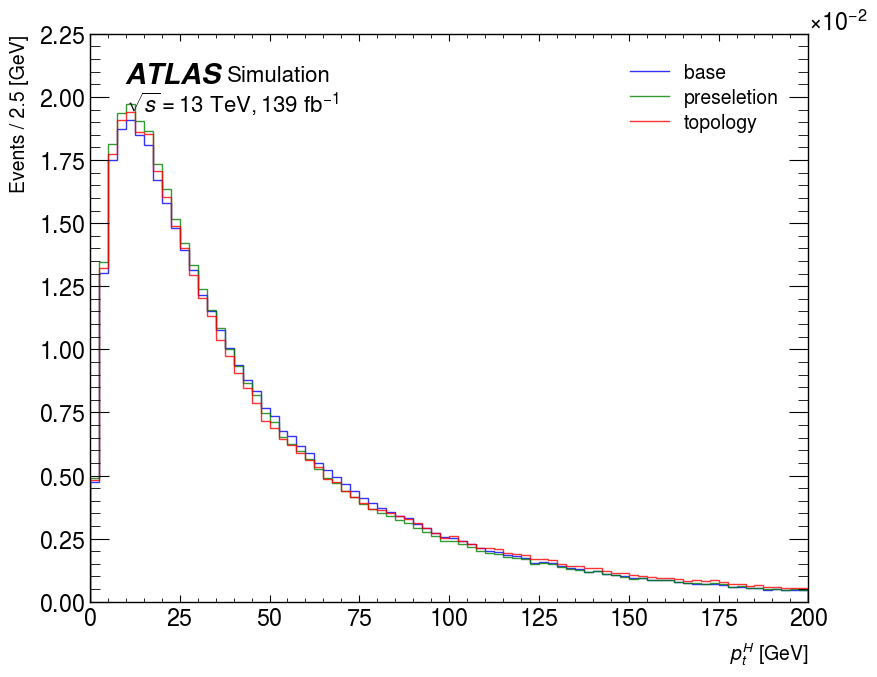

1D, Finish!


In [24]:
# Higgs px, py, pz

plot(
    base_sig_Hpx,
    preselect_sig_Hpx,
    topology_sig_Hpx,
    label,
    r"$p_{x}^{H}$",
    "Higgs_px",
    interval=[-200, 200],
    binNum=80,
    save=False,
)
plot(
    base_sig_Hpy,
    preselect_sig_Hpy,
    topology_sig_Hpy,
    label,
    r"$p_{y}^{H}$",
    "Higgs_py",
    interval=[-200, 200],
    binNum=80,
    save=False,
)
plot(
    base_sig_Hpz,
    preselect_sig_Hpz,
    topology_sig_Hpz,
    label,
    r"$p_{z}^{H}$",
    "Higgs_pz",
    interval=[-200, 200],
    binNum=80,
    save=False,
)
plot(
    base_sig_Hpt,
    preselect_sig_Hpt,
    topology_sig_Hpt,
    label,
    r"$p_{t}^{H}$",
    "Higgs_pt",
    interval=[0, 200],
    binNum=80,
    save=False,
)


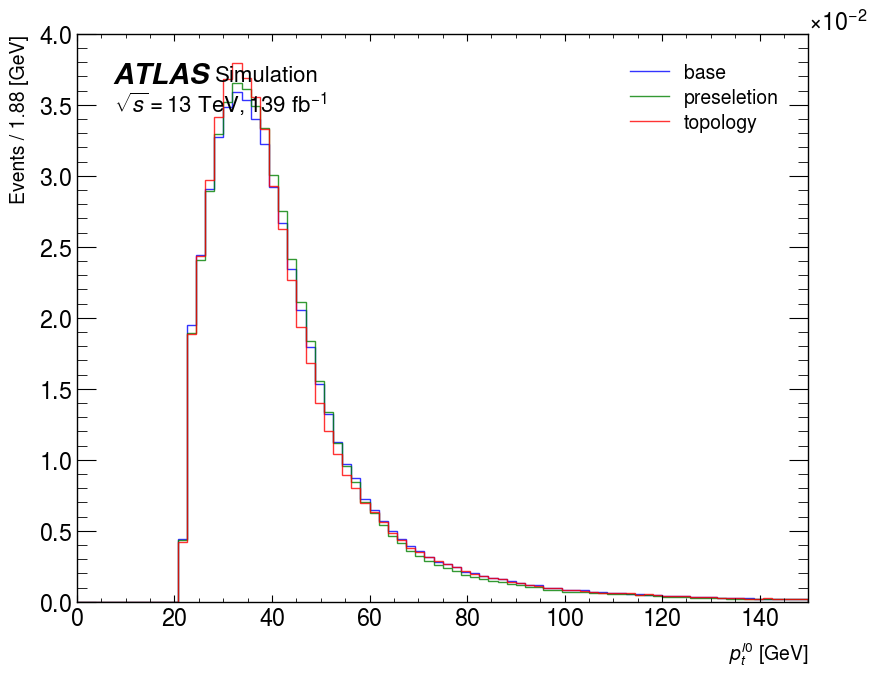

1D, Finish!


In [25]:
plot(
    base_sig_Lpt,
    preselect_sig_Lpt,
    topology_sig_Lpt,
    label,
    r"$p_{t}^{l0}$",
    "LeadLeapPt",
    interval=[0, 150],
    binNum=80,
    save=False,
)


use default range.


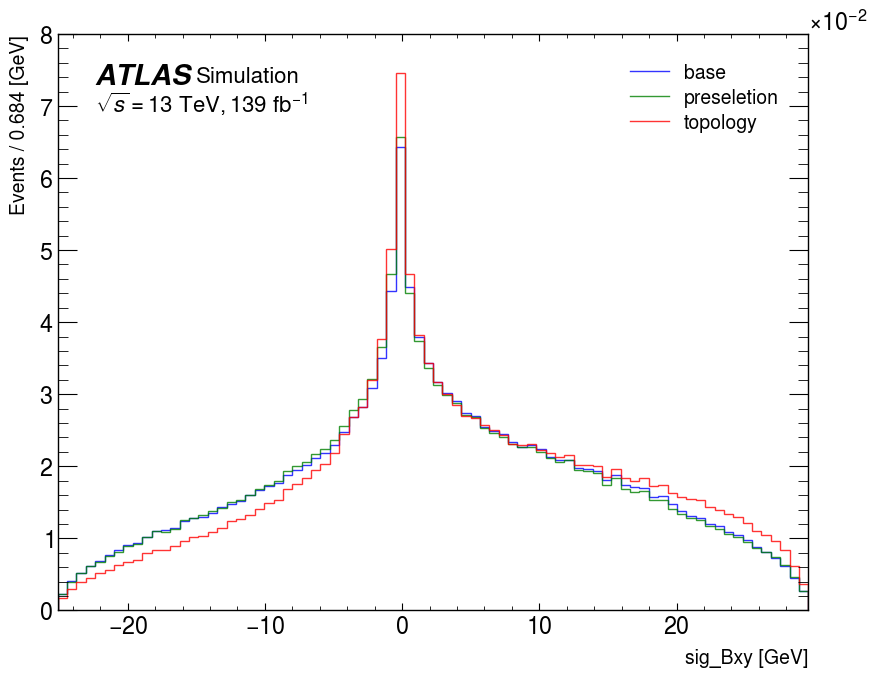

1D, Finish!
use default range.


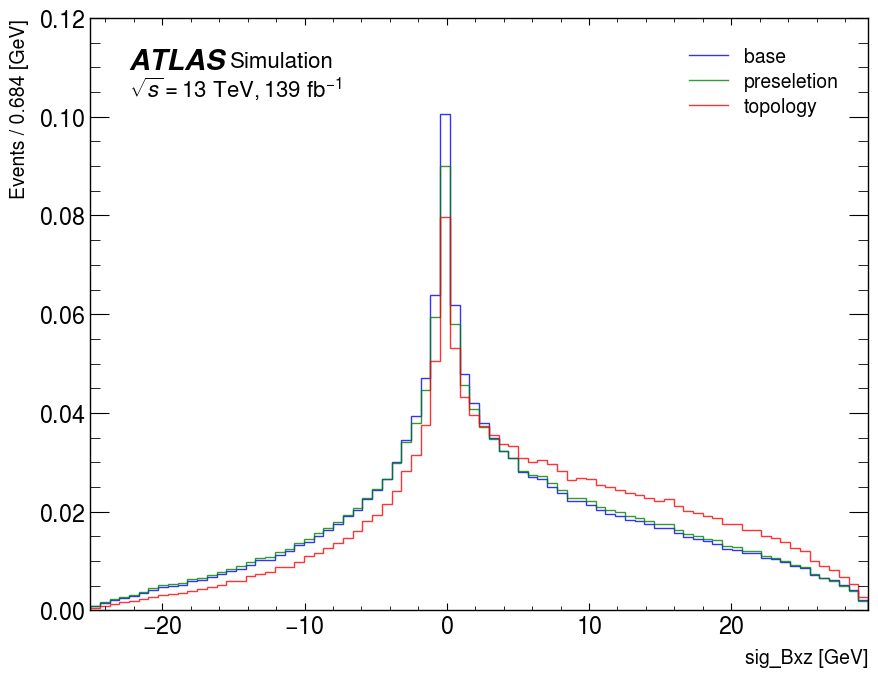

1D, Finish!
use default range.


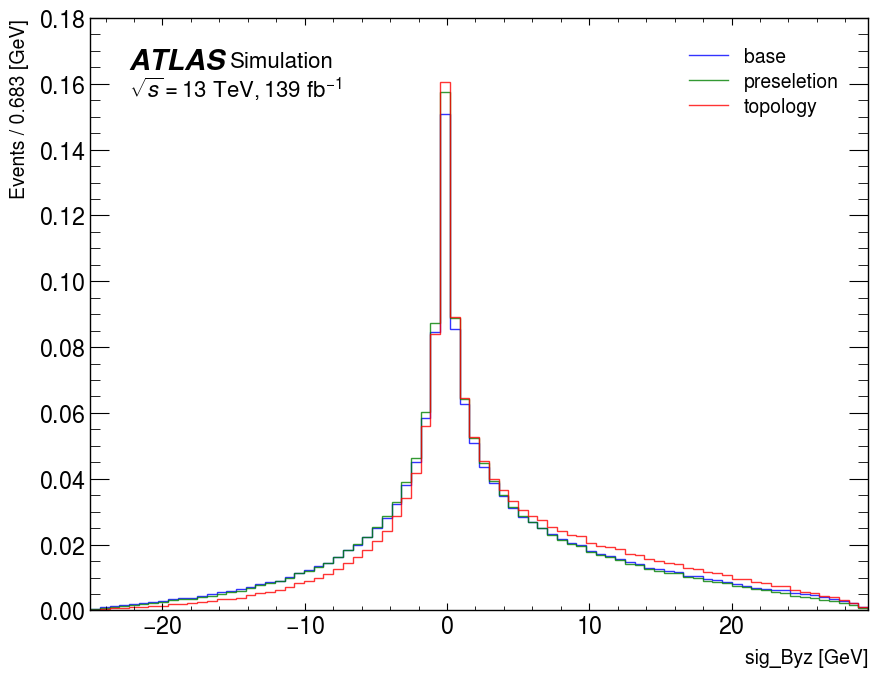

1D, Finish!


In [26]:
# Bij plot

# signal
plot(
    base_sig_Bxy,
    preselect_sig_Bxy,
    topology_sig_Bxy,
    label,
    "sig_Bxy",
    "sig_Bxy",
    binNum=80,
)
plot(
    base_sig_Bxz,
    preselect_sig_Bxz,
    topology_sig_Bxz,
    label,
    "sig_Bxz",
    "sig_Bxz",
    binNum=80,
)
plot(
    base_sig_Byz,
    preselect_sig_Byz,
    topology_sig_Byz,
    label,
    "sig_Byz",
    "sig_Byz",
    binNum=80,
)

In [27]:
# xi_p plot

# avg_on = False

# # signal
# plot(base_sig_xi_p_n, preselect_sig_xi_p_n, topology_sig_xi_p_n, label, r'$\xi_{p}^n$ (sig)', 'sig_xi_p_n', binNum=80)
# plot(base_sig_xi_p_r, preselect_sig_xi_p_r, topology_sig_xi_p_r, label, r'$\xi_{p}^r$ (sig)', 'sig_xi_p_r', binNum=80, grid=False, avg=avg_on)
# plot(base_sig_xi_p_k, preselect_sig_xi_p_k, topology_sig_xi_p_k, label, r'$\xi_{p}^k$ (sig)', 'sig_xi_p_k', binNum=80, grid=False, avg=avg_on)

# # background
# plot(base_bkg_xi_p_n, preselect_bkg_xi_p_n, topology_bkg_xi_p_n, label, r'$\xi_{p}^n$ (bkg)', 'bkg_xi_p_n', binNum=80, grid=False, avg=avg_on)
# plot(base_bkg_xi_p_r, preselect_bkg_xi_p_r, topology_bkg_xi_p_r, label, r'$\xi_{p}^r$ (bkg)', 'bkg_xi_p_r', binNum=80, grid=False, avg=avg_on)
# plot(base_bkg_xi_p_k, preselect_bkg_xi_p_k, topology_bkg_xi_p_k, label, r'$\xi_{p}^k$ (bkg)', 'bkg_xi_p_k', binNum=80, grid=False, avg=avg_on)

# # sig+bkg
# plot(base_tot_xi_p_n, preselect_tot_xi_p_n, topology_tot_xi_p_n, label, r'$\xi_{p}^n$ (tot)', 'tot_xi_p_n', binNum=80, grid=False, avg=avg_on)
# plot(base_tot_xi_p_r, preselect_tot_xi_p_r, topology_tot_xi_p_r, label, r'$\xi_{p}^r$ (tot)', 'tot_xi_p_r', binNum=80, grid=False, avg=avg_on)
# plot(base_tot_xi_p_k, preselect_tot_xi_p_k, topology_tot_xi_p_k, label, r'$\xi_{p}^k$ (tot)', 'tot_xi_p_k', binNum=80, grid=False, avg=avg_on)


In [28]:
# xi_m plot

# avg_on = False
# # signal
# plot(base_sig_xi_m_n, preselect_sig_xi_m_n, topology_sig_xi_m_n, label, r'$\xi_{m}^n$ (sig)', 'sig_xi_m_n', binNum=80, grid=False, avg=avg_on)
# plot(base_sig_xi_m_r, preselect_sig_xi_m_r, topology_sig_xi_m_r, label, r'$\xi_{m}^r$ (sig)', 'sig_xi_m_r', binNum=80, grid=False, avg=avg_on)
# plot(base_sig_xi_m_k, preselect_sig_xi_m_k, topology_sig_xi_m_k, label, r'$\xi_{m}^k$ (sig)', 'sig_xi_m_k', binNum=80, grid=False, avg=avg_on)

# # background
# plot(base_bkg_xi_m_n, preselect_bkg_xi_m_n, topology_bkg_xi_m_n, label, r'$\xi_{m}^n$ (bkg)', 'bkg_xi_m_n', binNum=80, grid=False, avg=avg_on)
# plot(base_bkg_xi_m_r, preselect_bkg_xi_m_r, topology_bkg_xi_m_r, label, r'$\xi_{m}^r$ (bkg)', 'bkg_xi_m_r', binNum=80, grid=False, avg=avg_on)
# plot(base_bkg_xi_m_k, preselect_bkg_xi_m_k, topology_bkg_xi_m_k, label, r'$\xi_{m}^k$ (bkg)', 'bkg_xi_m_k', binNum=80, grid=False, avg=avg_on)

# # sig+bkg
# plot(base_tot_xi_m_n, preselect_tot_xi_m_n, topology_tot_xi_m_n, label, r'$\xi_{m}^n$ (tot)', 'tot_xi_m_n', binNum=80, grid=False, avg=avg_on)
# plot(base_tot_xi_m_r, preselect_tot_xi_m_r, topology_tot_xi_m_r, label, r'$\xi_{m}^r$ (tot)', 'tot_xi_m_r', binNum=80, grid=False, avg=avg_on)
# plot(base_tot_xi_m_k, preselect_tot_xi_m_k, topology_tot_xi_m_k, label, r'$\xi_{m}^k$ (tot)', 'tot_xi_m_k', binNum=80, grid=False, avg=avg_on)


In [29]:
def ratio(ratio_data: list, bins=80):
    plt.style.use("default")
    for data in ratio_data:
        hist, bin_edges = np.histogram(data, bins=bins, density=False)
        plt.plot(bin_edges[:-1], hist, ".", markersize=5, alpha=0.9)
    plt.ylabel("ratio [null]")
    plt.xlabel("Events")
    # plt.semilogx()
    # plt.semilogy()
    plt.show()


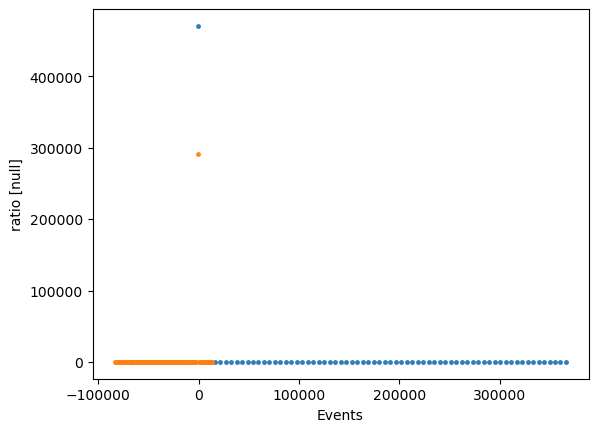

In [30]:
LxLz_ratio_base = base_sig_Lpx / base_sig_Lpz
LxLz_ratio_topology = topology_sig_Lpx / topology_sig_Lpz
LyLz_ratio_base = base_sig_Lpy / base_sig_Lpz
LyLz_ratio_topology = topology_sig_Lpy / topology_sig_Lpz
ratio([LxLz_ratio_base, LyLz_ratio_topology])

In [31]:
hist, bin_edges = np.histogram(LxLz_ratio_base, bins=80, density=False)
hist[1:100]


array([     0,      0,      0,      2,      0,      0,      3,      0,
            6,      7,    157, 470474,      3,      2,      0,      3,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      1])